## Importing the libraries and the packages


In [1]:
# Basic
import numpy as np
import pandas as pd
import warnings
#Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

warnings.filterwarnings('ignore')


### Exploring the dataset

In [2]:
Data = pd.read_csv("D:/YR2 Sem2/AI/Datasets/co2_emissions_tonnes_per_person.csv")

In [3]:
Data

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.238,0.290,0.406,0.345,0.280,0.253,0.262,0.245,0.247,0.254
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.230,1.240,1.250,1.350,1.280,1.640,1.220,1.180,1.140,1.120
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.470,1.560,1.790,1.690,1.690,1.900,1.600,1.570,1.610,1.590
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.120,6.120,5.870,5.920,5.900,5.830,5.970,6.070,6.270,6.120
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.900,18.300,18.900,23.800,23.700,24.200,20.700,21.700,21.100,21.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.010,1.010,1.080,1.050,1.040,1.090,1.210,1.260,1.290,1.320
190,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.080,1.000,0.849,0.747,0.994,0.937,0.480,0.377,0.363,0.356
191,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.960,9.160,9.160,8.770,8.530,8.860,8.350,8.460,8.120,8.100
192,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.182,0.189,0.199,0.241,0.252,0.277,0.271,0.296,0.304,0.302


In [4]:
Data.shape

(194, 220)

### Feature Engineering and Data Cleaning
* dealing the missing values
<br />
<br />
After testing dropna(), it is observed that most of the rows will be deleted and we remain with only five rows, therefore i will consider removing most of the years with null values and then carry out imputation to the null values of the remaining features.
<br />
<br />
Considering the years 1960-2018

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 220 entries, country to 2018
dtypes: float64(215), object(5)
memory usage: 333.6+ KB


In [6]:
Data = Data.drop(columns=['1800','1801','1802','1803','1804','1805', '1806','1807','1808','1809','1810','1811','1812','1813','1814','1815','1816','1817','1818','1819','1820','1821','1822','1823','1824','1825','1826','1827','1828','1829','1830','1831','1832','1833','1834','1835','1836','1837','1838','1839','1840','1841','1842','1843','1844','1845','1846','1847','1848','1849','1850','1851','1852','1853','1854','1855','1856','1857','1858','1859','1860','1861','1862','1863','1864','1865','1866','1867','1868','1869','1870','1871','1872','1873','1874','1875','1876','1877','1878','1879','1880','1881','1882','1883','1884','1885','1886','1887','1888','1889','1890','1891','1892','1893','1894','1895','1896','1897','1898','1899','1900','1901','1902','1903','1904','1905','1906','1907','1908','1909','1910','1911','1912','1913','1914','1915','1916','1917','1918','1919','1920','1921','1922','1923','1924','1925','1926','1927','1928','1929','1930','1931','1932','1933','1934','1935','1936','1937','1938','1939','1940','1941','1942','1943','1944','1945','1946','1947','1948','1949','1950','1951','1952','1953','1954','1955','1956','1957','1958','1959'])

In [7]:
Data.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.046,0.0536,0.0737,0.0741,0.0861,0.101,0.107,0.123,0.115,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,Angola,0.101,0.0821,0.2100,0.2030,0.2130,0.206,0.269,0.172,0.289,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
2,Albania,1.240,1.3500,1.4200,1.1600,1.0900,1.150,1.310,1.340,1.500,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
4,United Arab Emirates,0.119,0.1090,0.1640,0.1760,0.1330,0.147,0.160,5.400,6.810,...,20.900,18.30,18.900,23.800,23.70,24.200,20.700,21.700,21.100,21.400


In [8]:
Data = Data.fillna(Data.median())

In [9]:
Data.isnull().sum()

country    0
1960       0
1961       0
1962       0
1963       0
1964       0
1965       0
1966       0
1967       0
1968       0
1969       0
1970       0
1971       0
1972       0
1973       0
1974       0
1975       0
1976       0
1977       0
1978       0
1979       0
1980       0
1981       0
1982       0
1983       0
1984       0
1985       0
1986       0
1987       0
1988       0
1989       0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
dtype: int64

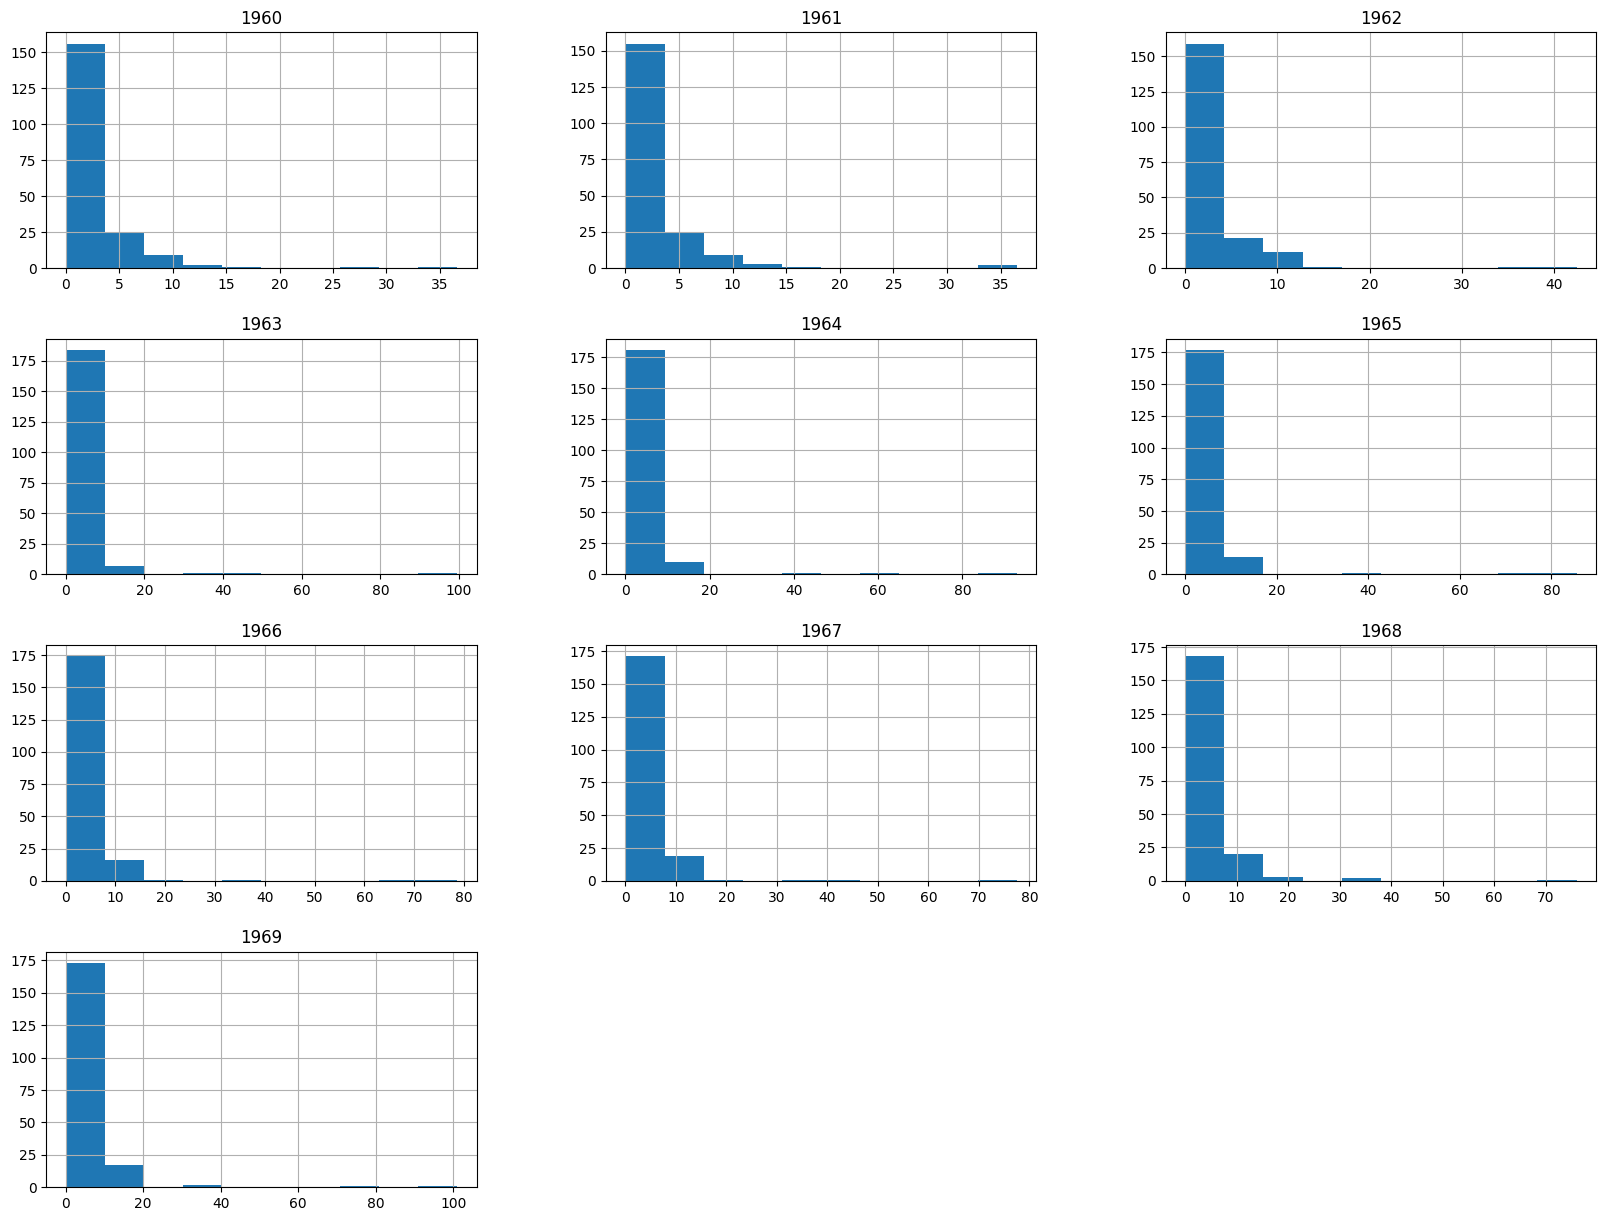

In [10]:
Data.hist(['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969'], figsize=(20, 15))
plt.show()

In [11]:
Data['1966'][Data['1969']>19].sort_values()

4       0.16
7       5.81
183    17.60
105    35.00
95     67.20
145    78.60
Name: 1966, dtype: float64

In [12]:
Data['1960'][Data['1960']>15] = 12.5
Data['1961'][Data['1961']>15] = 12.2
Data['1962'][Data['1962']>12] = 11.9
Data['1963'][Data['1963']>15] = 12.2
Data['1964'][Data['1964']>10] = 11.0
Data['1965'][Data['1965']>10] = 11.0
Data['1966'][Data['1966']>10] = 10.0
Data['1967'][Data['1967']>10] = 10.9
Data['1968'][Data['1968']>10] = 8.6
Data['1969'][Data['1969']>19] = 17.6

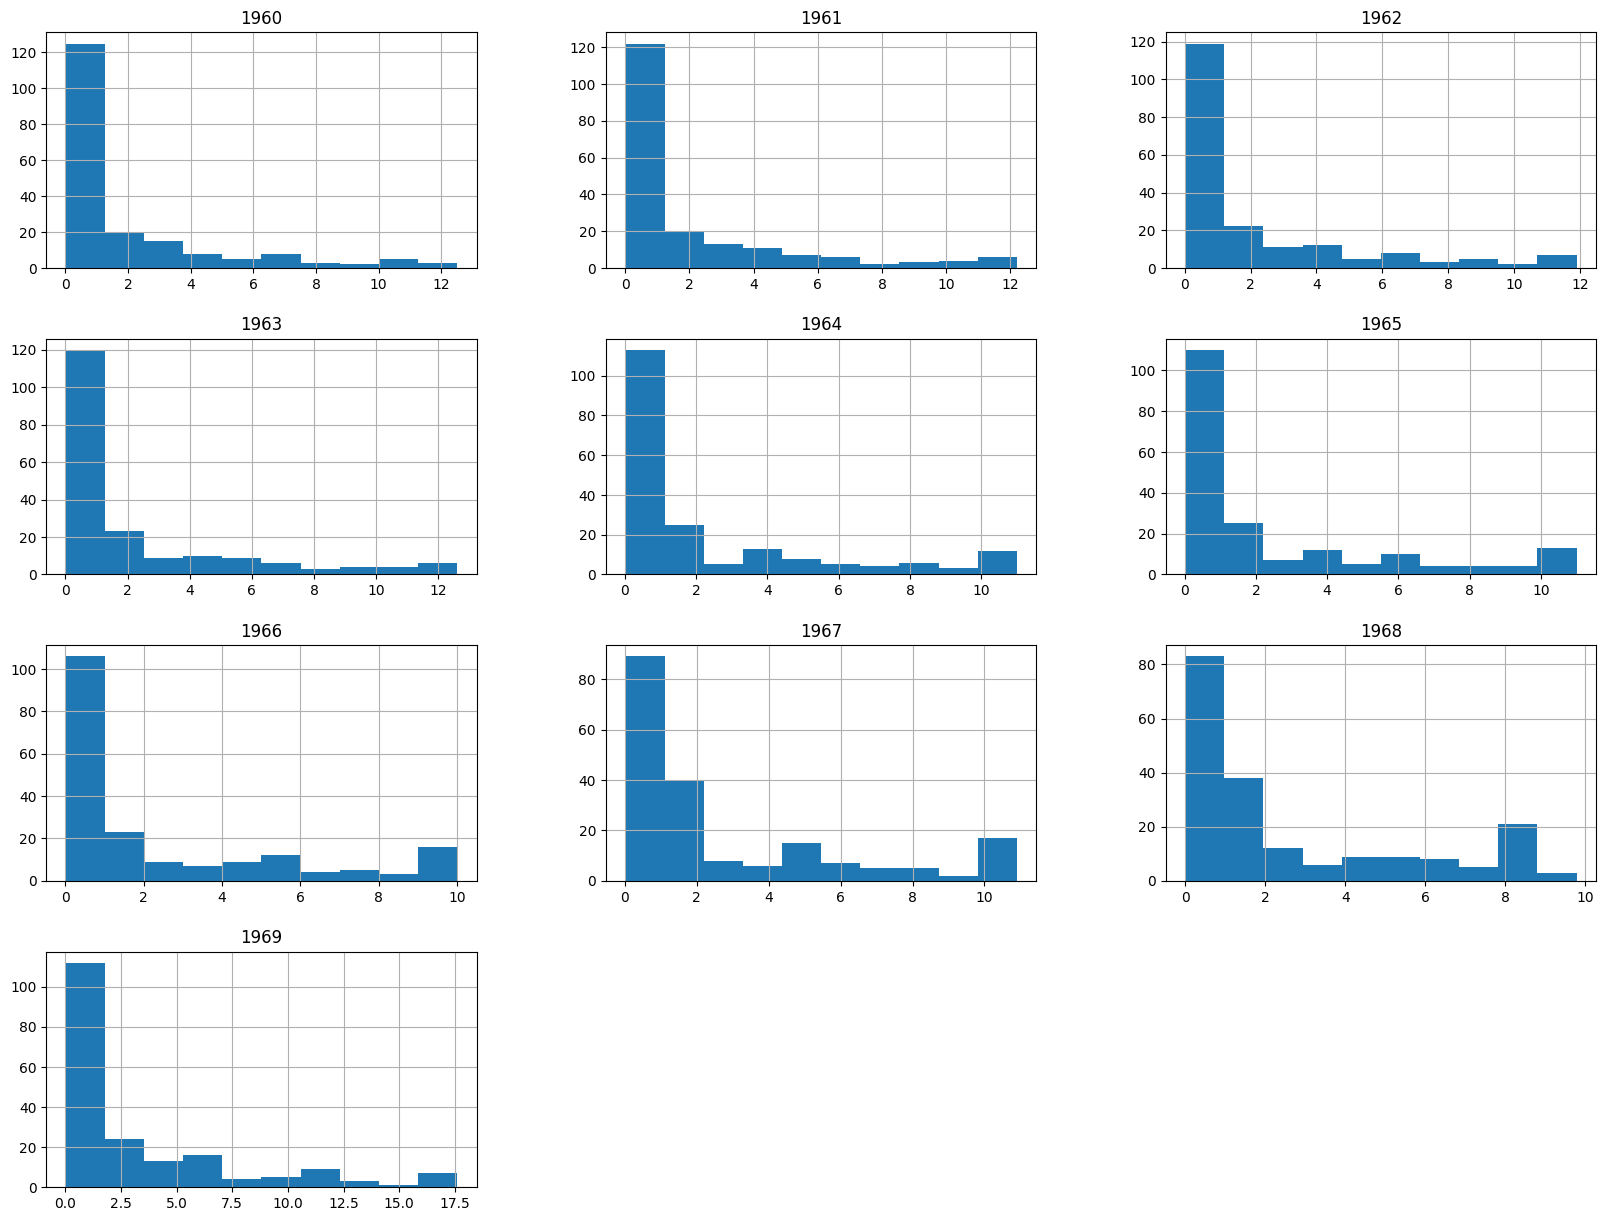

In [13]:
Data.hist(['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969'], figsize=(20, 15))
plt.show()

array([[<AxesSubplot: title={'center': '1970'}>,
        <AxesSubplot: title={'center': '1971'}>,
        <AxesSubplot: title={'center': '1972'}>],
       [<AxesSubplot: title={'center': '1973'}>,
        <AxesSubplot: title={'center': '1974'}>,
        <AxesSubplot: title={'center': '1975'}>],
       [<AxesSubplot: title={'center': '1976'}>,
        <AxesSubplot: title={'center': '1977'}>,
        <AxesSubplot: title={'center': '1978'}>],
       [<AxesSubplot: title={'center': '1979'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

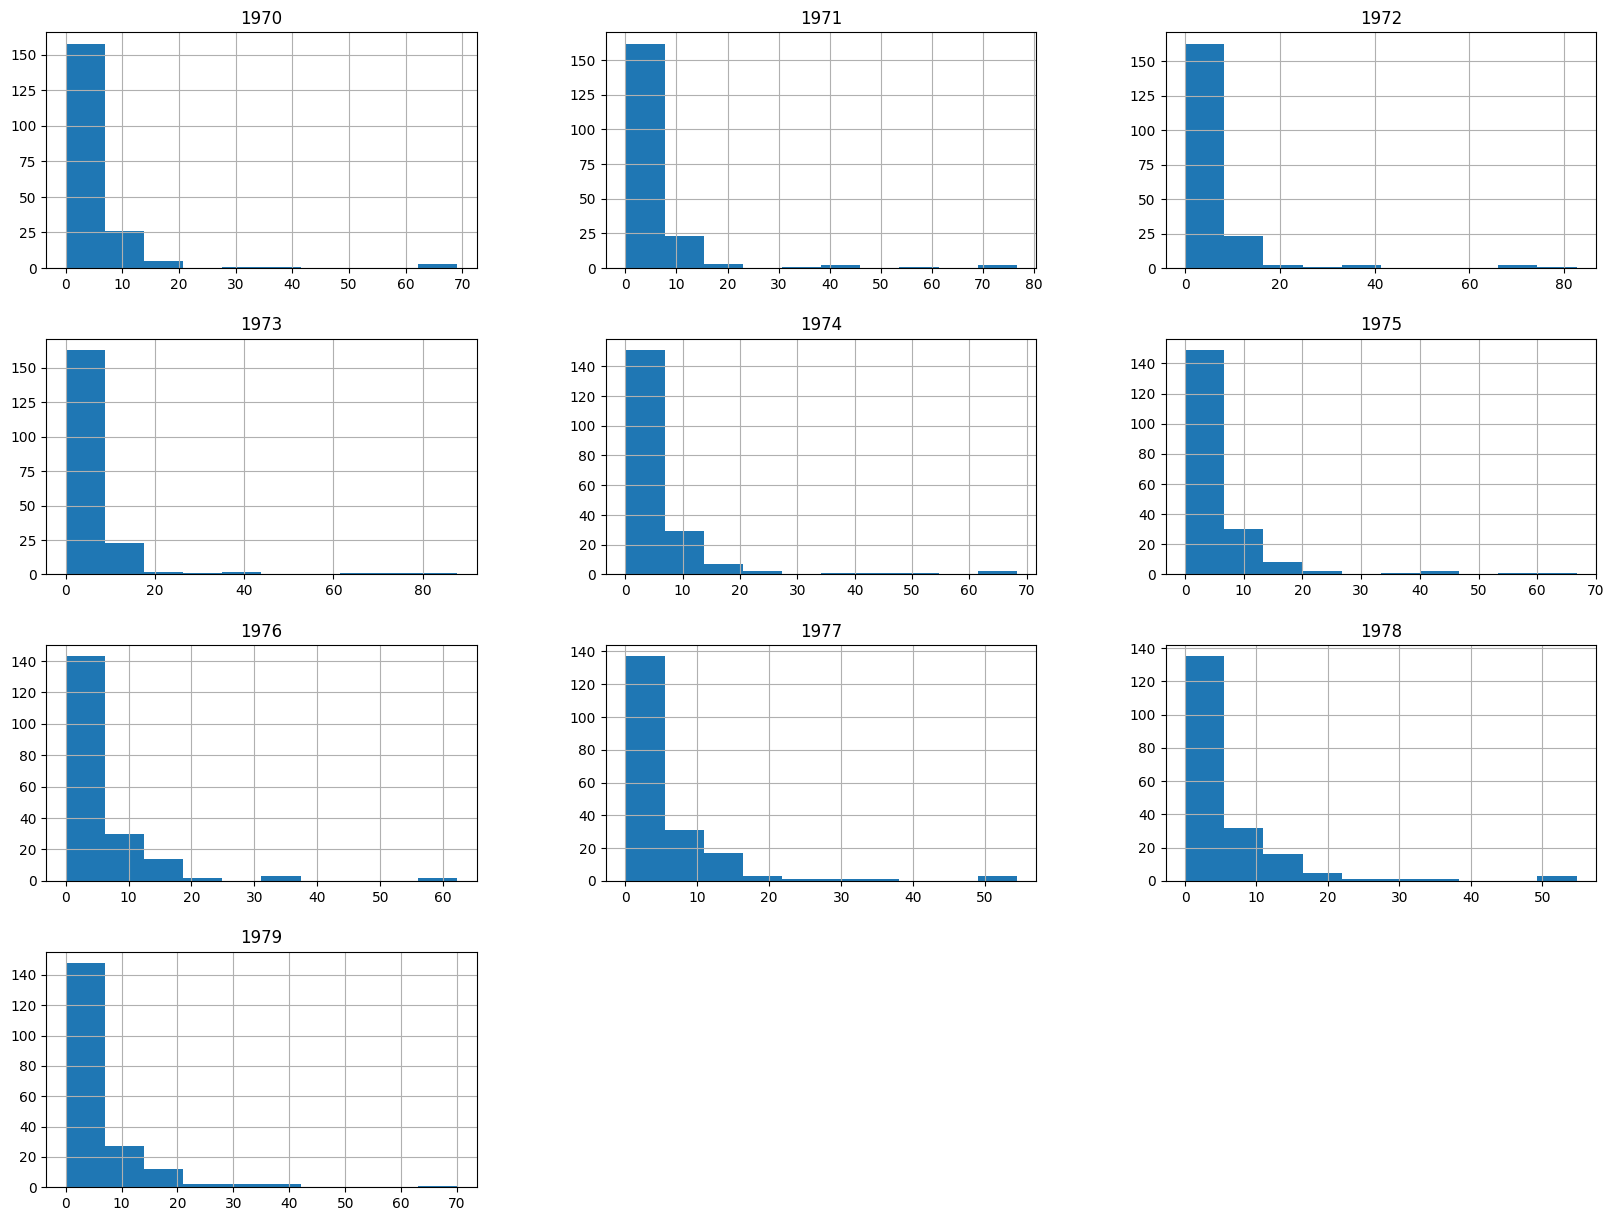

In [14]:
Data.hist(['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979'], figsize=(20, 15))

In [15]:
Data['1979'][Data['1979']>20].sort_values()

183    21.5
17     23.7
18     33.6
105    33.6
4      39.3
25     39.7
145    70.0
Name: 1979, dtype: float64

In [16]:
Data['1970'][Data['1970']>18] = 15.0
Data['1971'][Data['1971']>18] = 20.6
Data['1972'][Data['1972']>16] = 15.0
Data['1973'][Data['1973']>15] = 16.5
Data['1974'][Data['1974']>20] = 20.1
Data['1975'][Data['1975']>20] = 20.1
Data['1976'][Data['1976']>15] = 10.0
Data['1977'][Data['1977']>18] = 18.2
Data['1978'][Data['1978']>20] = 21.7
Data['1979'][Data['1979']>19] = 21.5

array([[<AxesSubplot: title={'center': '1970'}>,
        <AxesSubplot: title={'center': '1971'}>,
        <AxesSubplot: title={'center': '1972'}>],
       [<AxesSubplot: title={'center': '1973'}>,
        <AxesSubplot: title={'center': '1974'}>,
        <AxesSubplot: title={'center': '1975'}>],
       [<AxesSubplot: title={'center': '1976'}>,
        <AxesSubplot: title={'center': '1977'}>,
        <AxesSubplot: title={'center': '1978'}>],
       [<AxesSubplot: title={'center': '1979'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

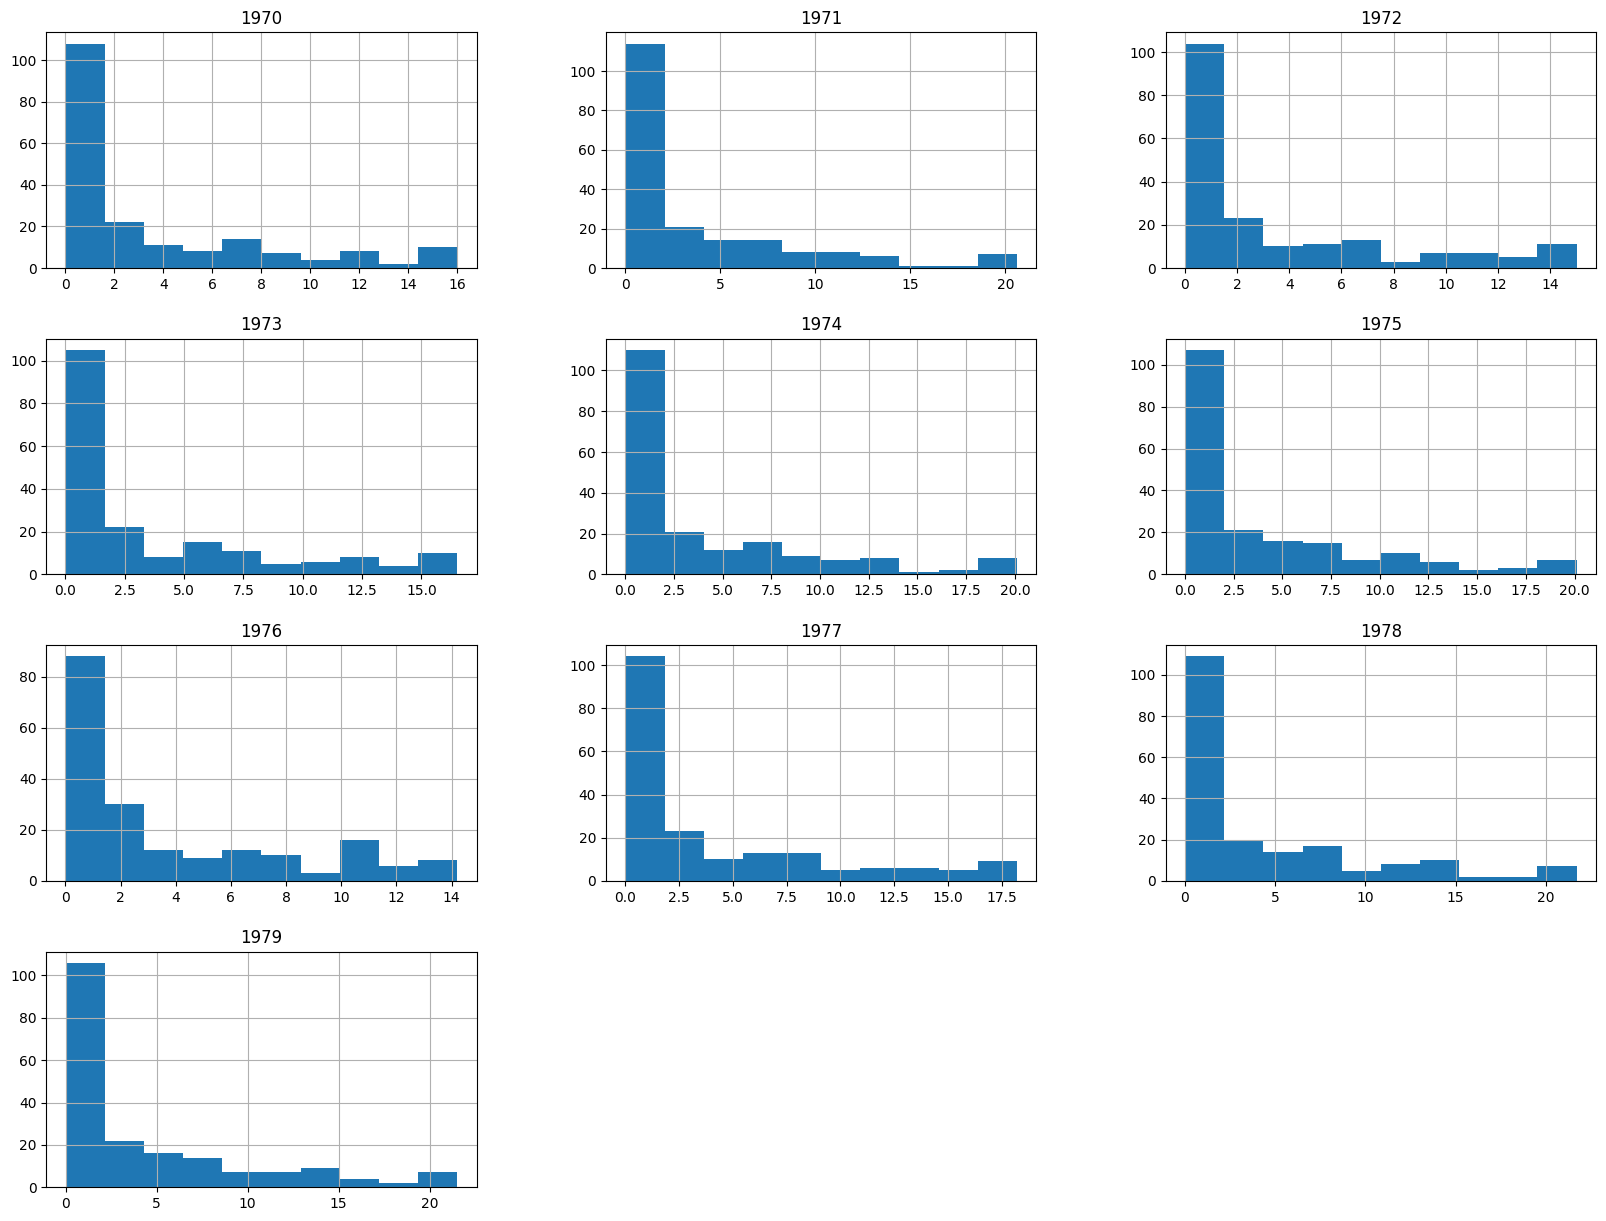

In [17]:
Data.hist(['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979'], figsize=(20, 15))

array([[<AxesSubplot: title={'center': '1980'}>,
        <AxesSubplot: title={'center': '1981'}>,
        <AxesSubplot: title={'center': '1982'}>],
       [<AxesSubplot: title={'center': '1983'}>,
        <AxesSubplot: title={'center': '1984'}>,
        <AxesSubplot: title={'center': '1985'}>],
       [<AxesSubplot: title={'center': '1986'}>,
        <AxesSubplot: title={'center': '1987'}>,
        <AxesSubplot: title={'center': '1988'}>],
       [<AxesSubplot: title={'center': '1989'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

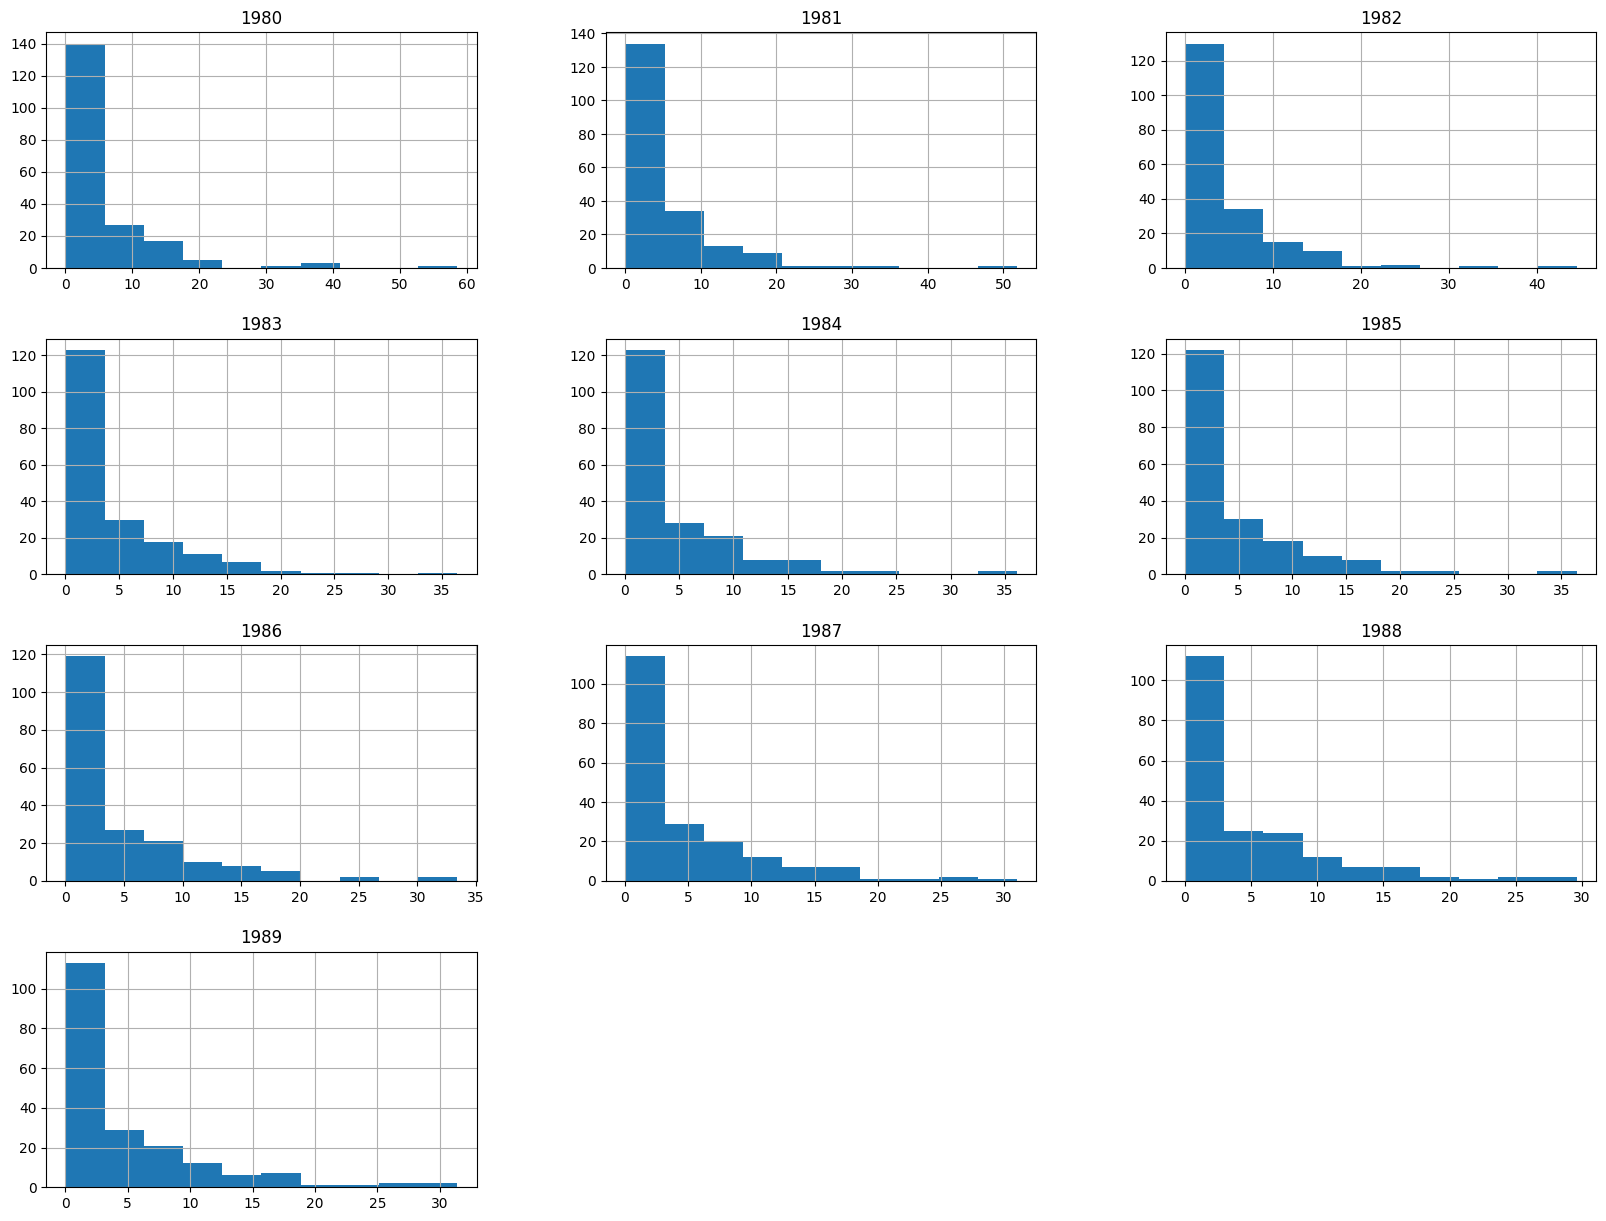

In [18]:
Data.hist(['1980','1981','1982','1983','1984','1985','1986','1987','1988','1989'], figsize=(20, 15))

In [19]:
Data['1989'][Data['1989']>16].sort_values()

147    16.1
8      16.6
43     16.7
29     17.0
131    17.0
95     17.1
54     17.9
183    19.8
17     24.4
25     25.2
105    26.2
145    31.0
4      31.4
Name: 1989, dtype: float64

In [20]:
Data['1980'][Data['1980']>20]= 20.6
Data['1981'][Data['1981']>20]= 22.8
Data['1982'][Data['1982']>16]= 17.0
Data['1983'][Data['1983']>20]= 20.8
Data['1984'][Data['1984']>20]= 19.0
Data['1985'][Data['1985']>20]= 18.3
Data['1986'][Data['1986']>20]= 18.5
Data['1987'][Data['1987']>16]= 16.3
Data['1988'][Data['1988']>18]= 19.8
Data['1989'][Data['1989']>16]= 17.0

array([[<AxesSubplot: title={'center': '1980'}>,
        <AxesSubplot: title={'center': '1981'}>,
        <AxesSubplot: title={'center': '1982'}>],
       [<AxesSubplot: title={'center': '1983'}>,
        <AxesSubplot: title={'center': '1984'}>,
        <AxesSubplot: title={'center': '1985'}>],
       [<AxesSubplot: title={'center': '1986'}>,
        <AxesSubplot: title={'center': '1987'}>,
        <AxesSubplot: title={'center': '1988'}>],
       [<AxesSubplot: title={'center': '1989'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

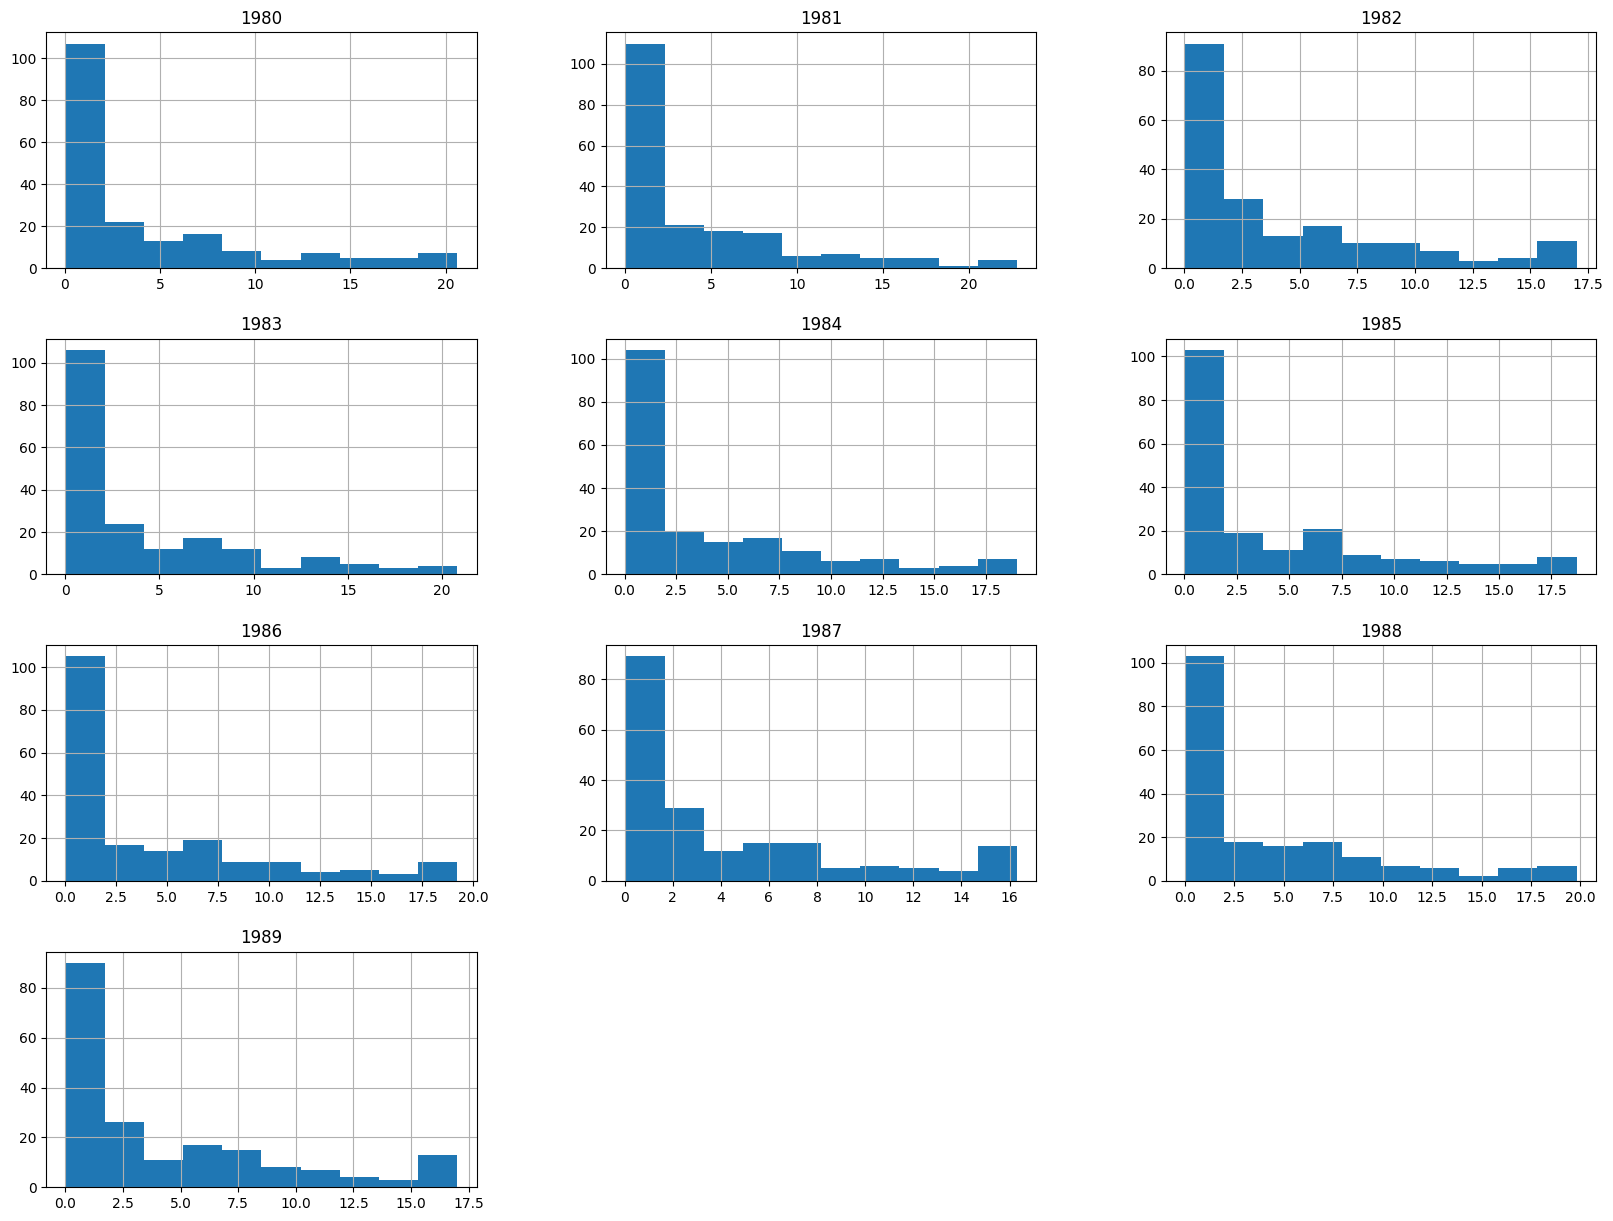

In [21]:
Data.hist(['1980','1981','1982','1983','1984','1985','1986','1987','1988','1989'], figsize=(20, 15))

array([[<AxesSubplot: title={'center': '1990'}>,
        <AxesSubplot: title={'center': '1991'}>,
        <AxesSubplot: title={'center': '1992'}>],
       [<AxesSubplot: title={'center': '1993'}>,
        <AxesSubplot: title={'center': '1994'}>,
        <AxesSubplot: title={'center': '1995'}>],
       [<AxesSubplot: title={'center': '1996'}>,
        <AxesSubplot: title={'center': '1997'}>,
        <AxesSubplot: title={'center': '1998'}>],
       [<AxesSubplot: title={'center': '1999'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

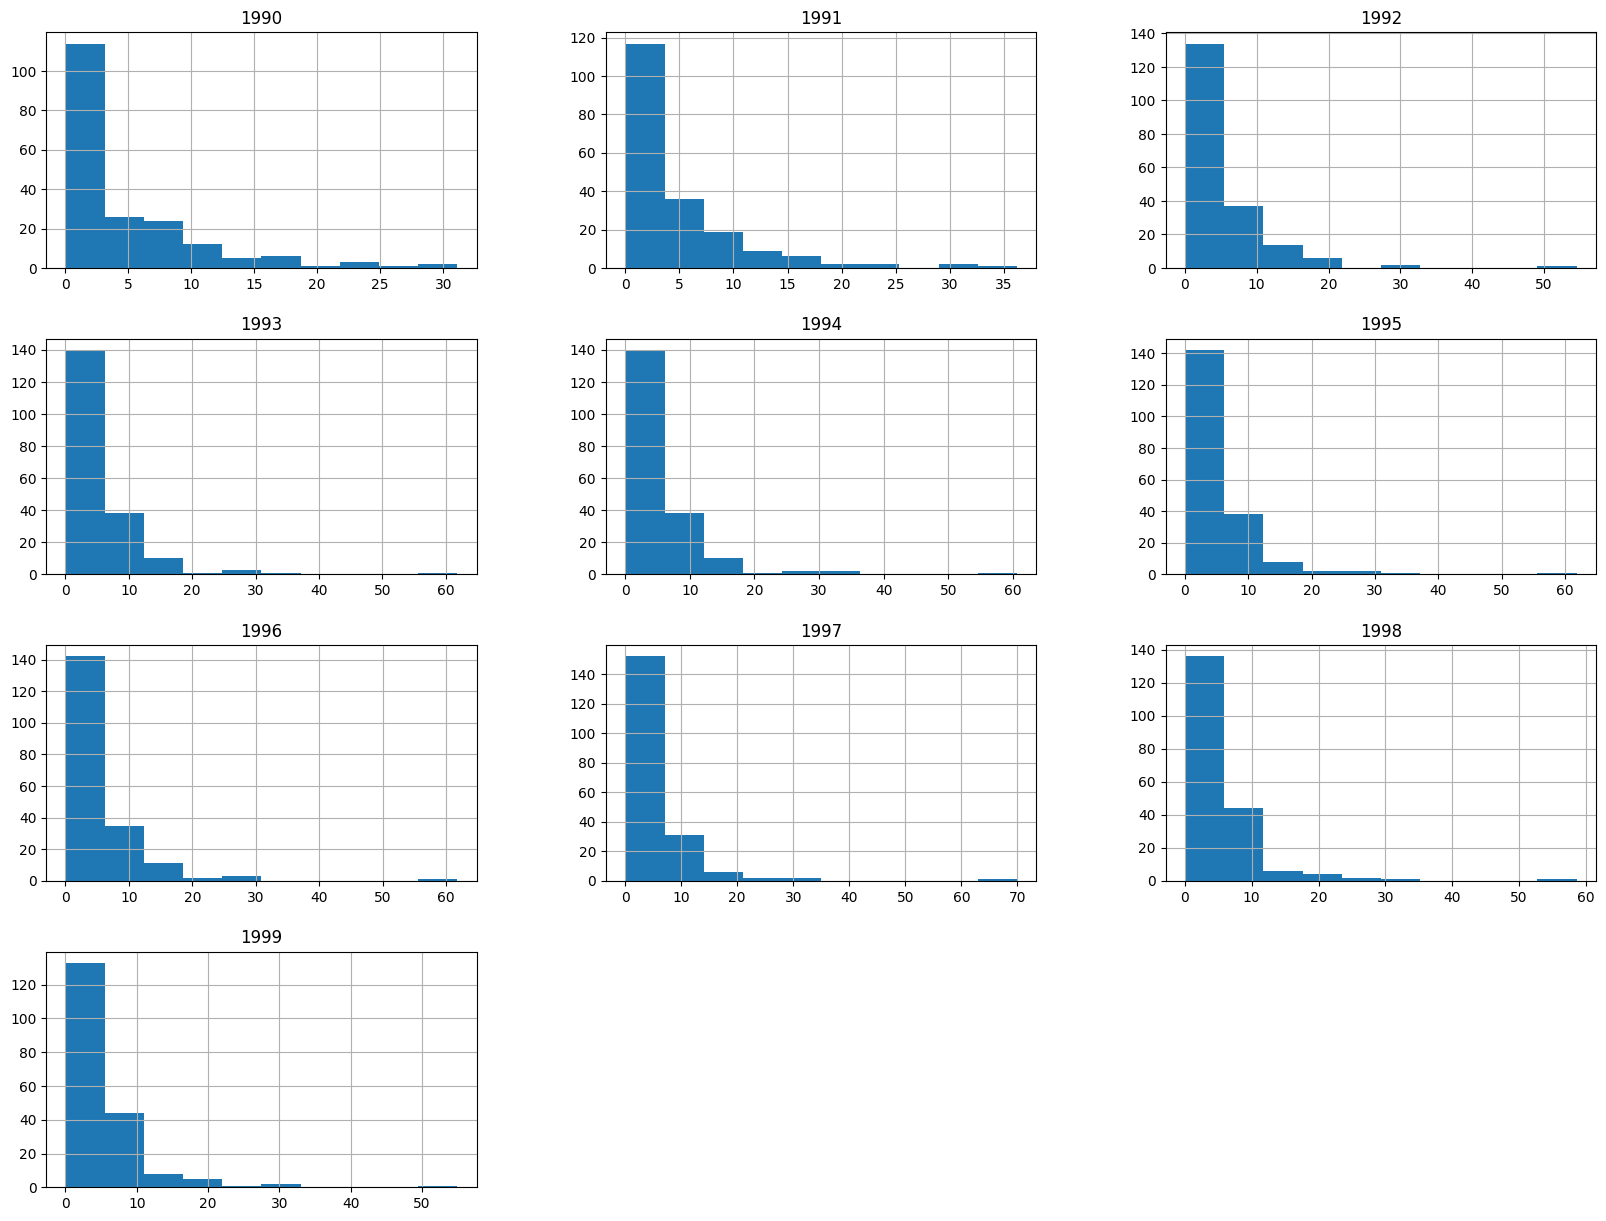

In [22]:
Data.hist(['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999'], figsize=(20, 15))

In [23]:
Data['1999'][Data['1999']>20].sort_values()

183    20.9
4      26.2
95     27.6
17     28.3
145    54.9
Name: 1999, dtype: float64

In [24]:
Data['1990'][Data['1990']>20]= 20.6
Data['1991'][Data['1991']>20]= 22.8
Data['1992'][Data['1992']>16]= 17.0
Data['1993'][Data['1993']>20]= 20.8
Data['1994'][Data['1994']>20]= 19.0
Data['1995'][Data['1995']>20]= 18.3
Data['1996'][Data['1996']>20]= 18.5
Data['1997'][Data['1997']>16]= 16.3
Data['1998'][Data['1998']>18]= 19.8
Data['1999'][Data['1999']>16]= 12.5


array([[<AxesSubplot: title={'center': '1990'}>,
        <AxesSubplot: title={'center': '1991'}>,
        <AxesSubplot: title={'center': '1992'}>],
       [<AxesSubplot: title={'center': '1993'}>,
        <AxesSubplot: title={'center': '1994'}>,
        <AxesSubplot: title={'center': '1995'}>],
       [<AxesSubplot: title={'center': '1996'}>,
        <AxesSubplot: title={'center': '1997'}>,
        <AxesSubplot: title={'center': '1998'}>],
       [<AxesSubplot: title={'center': '1999'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

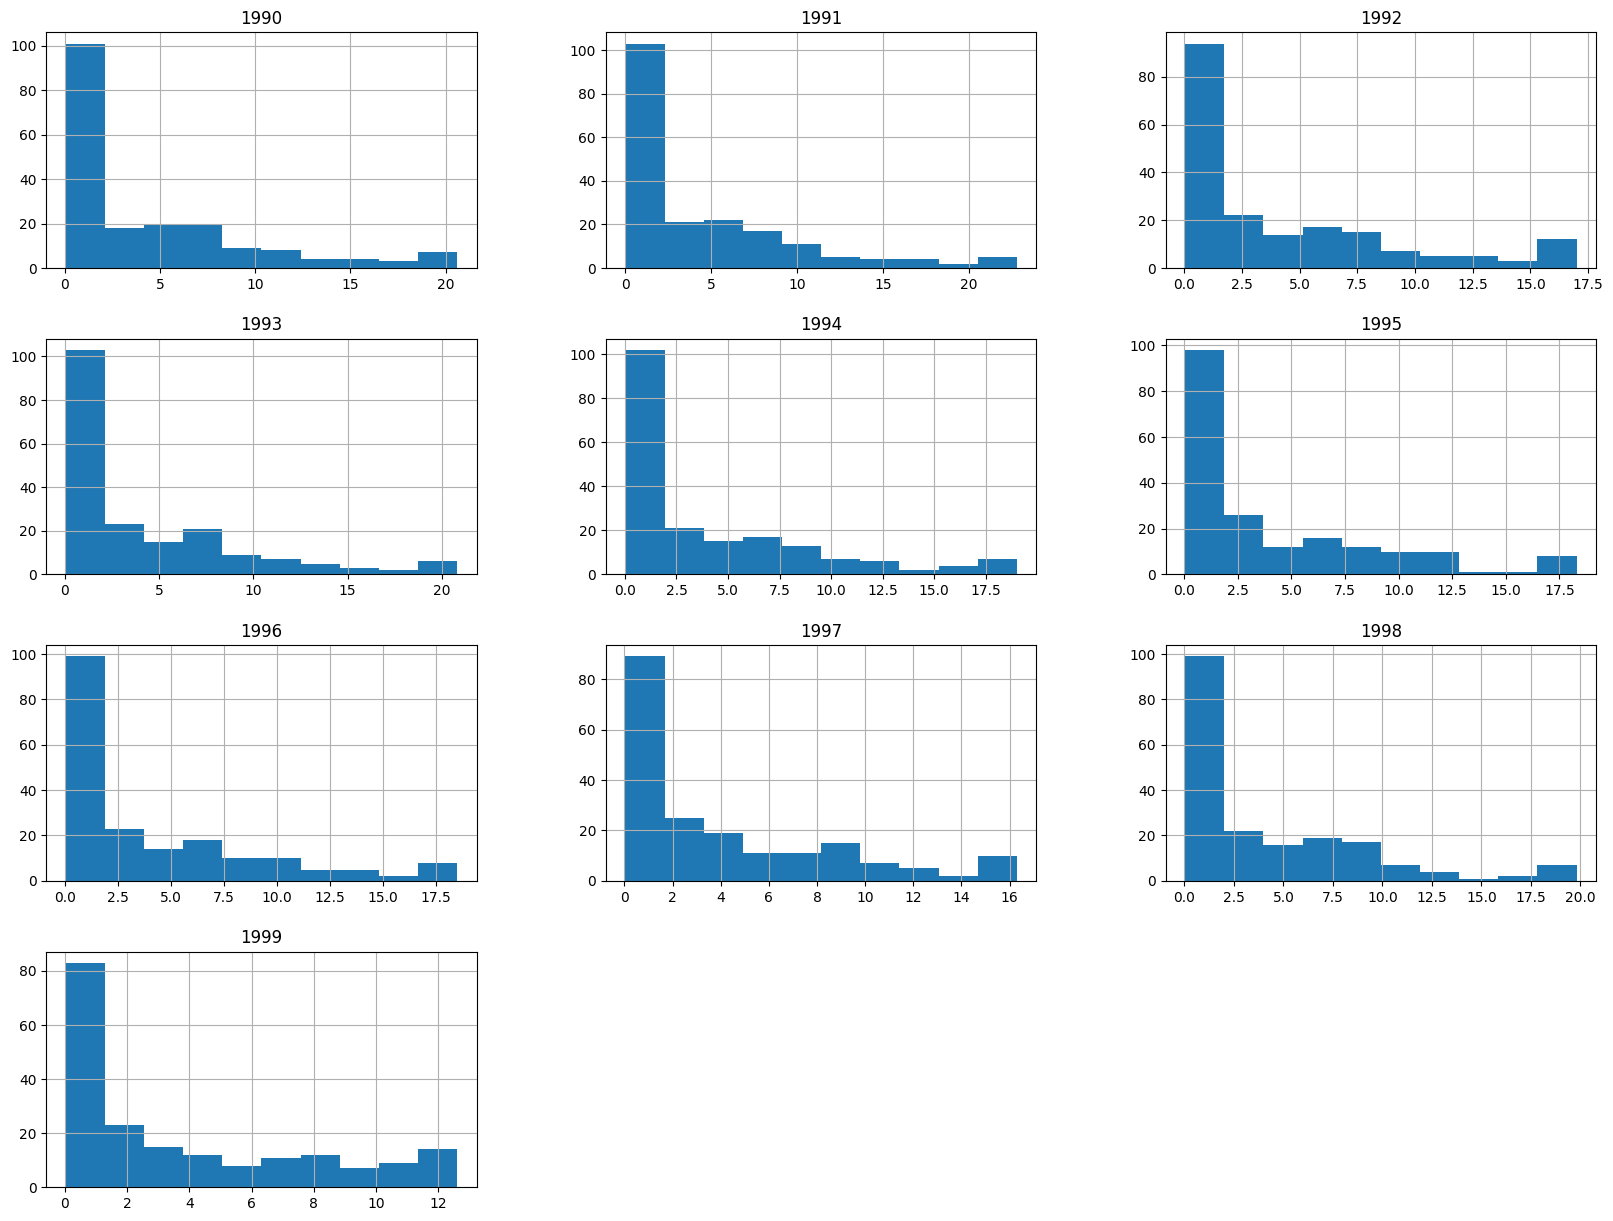

In [25]:
Data.hist(['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999'], figsize=(20, 15))

array([[<AxesSubplot: title={'center': '2000'}>,
        <AxesSubplot: title={'center': '2001'}>,
        <AxesSubplot: title={'center': '2002'}>],
       [<AxesSubplot: title={'center': '2003'}>,
        <AxesSubplot: title={'center': '2004'}>,
        <AxesSubplot: title={'center': '2005'}>],
       [<AxesSubplot: title={'center': '2006'}>,
        <AxesSubplot: title={'center': '2007'}>,
        <AxesSubplot: title={'center': '2008'}>],
       [<AxesSubplot: title={'center': '2009'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

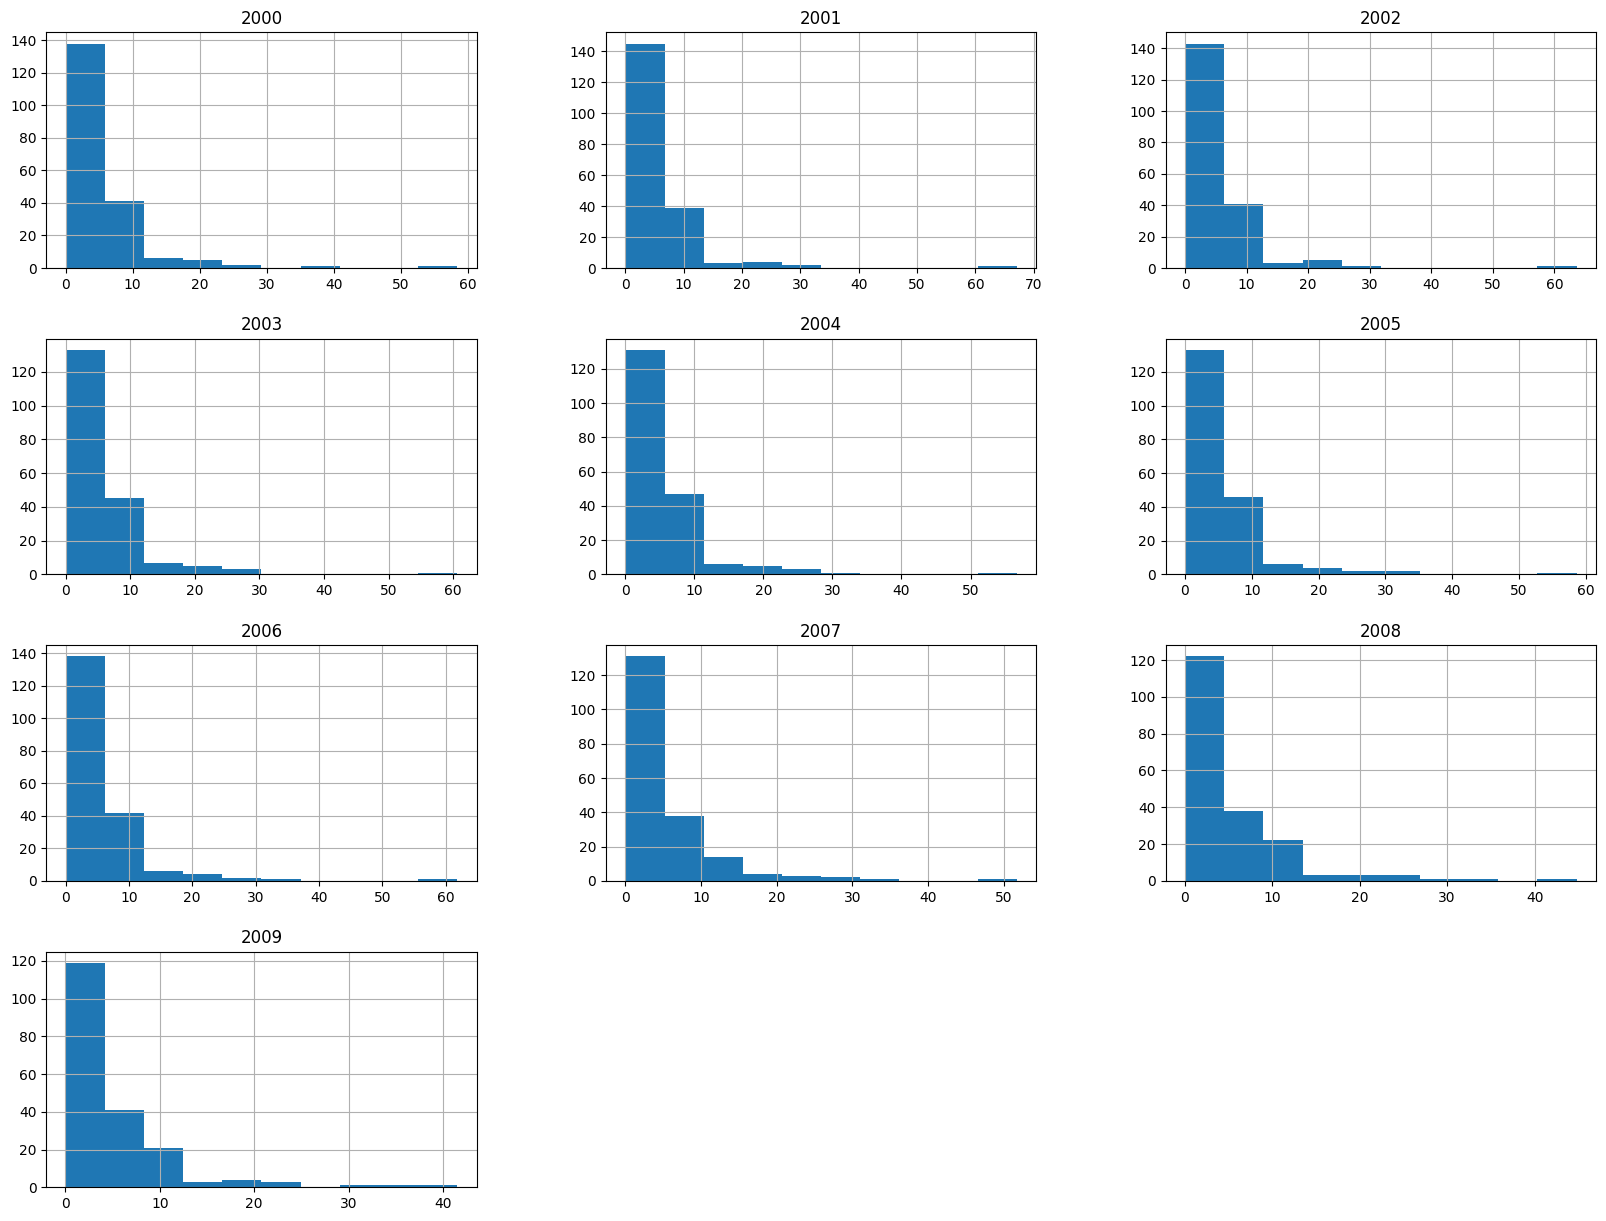

In [26]:
Data.hist(['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009'], figsize=(20, 15))

In [27]:
Data['2009'][Data['2009']>20].sort_values()

25     20.2
4      20.9
105    21.5
17     23.7
95     30.8
174    33.9
145    41.5
Name: 2009, dtype: float64

In [28]:
Data['2000'][Data['2000']>20]= 16.6
Data['2001'][Data['2001']>20]= 13.6
Data['2002'][Data['2002']>20]= 15.8
Data['2003'][Data['2003']>16]= 17.0
Data['2004'][Data['2004']>20]= 14.8
Data['2005'][Data['2005']>20]= 12.6
Data['2006'][Data['2006']>20]= 15.3
Data['2007'][Data['2007']>20]= 18.5
Data['2008'][Data['2008']>16]= 16.3
Data['2009'][Data['2009']>18]= 19.8

array([[<AxesSubplot: title={'center': '2000'}>,
        <AxesSubplot: title={'center': '2001'}>,
        <AxesSubplot: title={'center': '2002'}>],
       [<AxesSubplot: title={'center': '2003'}>,
        <AxesSubplot: title={'center': '2004'}>,
        <AxesSubplot: title={'center': '2005'}>],
       [<AxesSubplot: title={'center': '2006'}>,
        <AxesSubplot: title={'center': '2007'}>,
        <AxesSubplot: title={'center': '2008'}>],
       [<AxesSubplot: title={'center': '2009'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

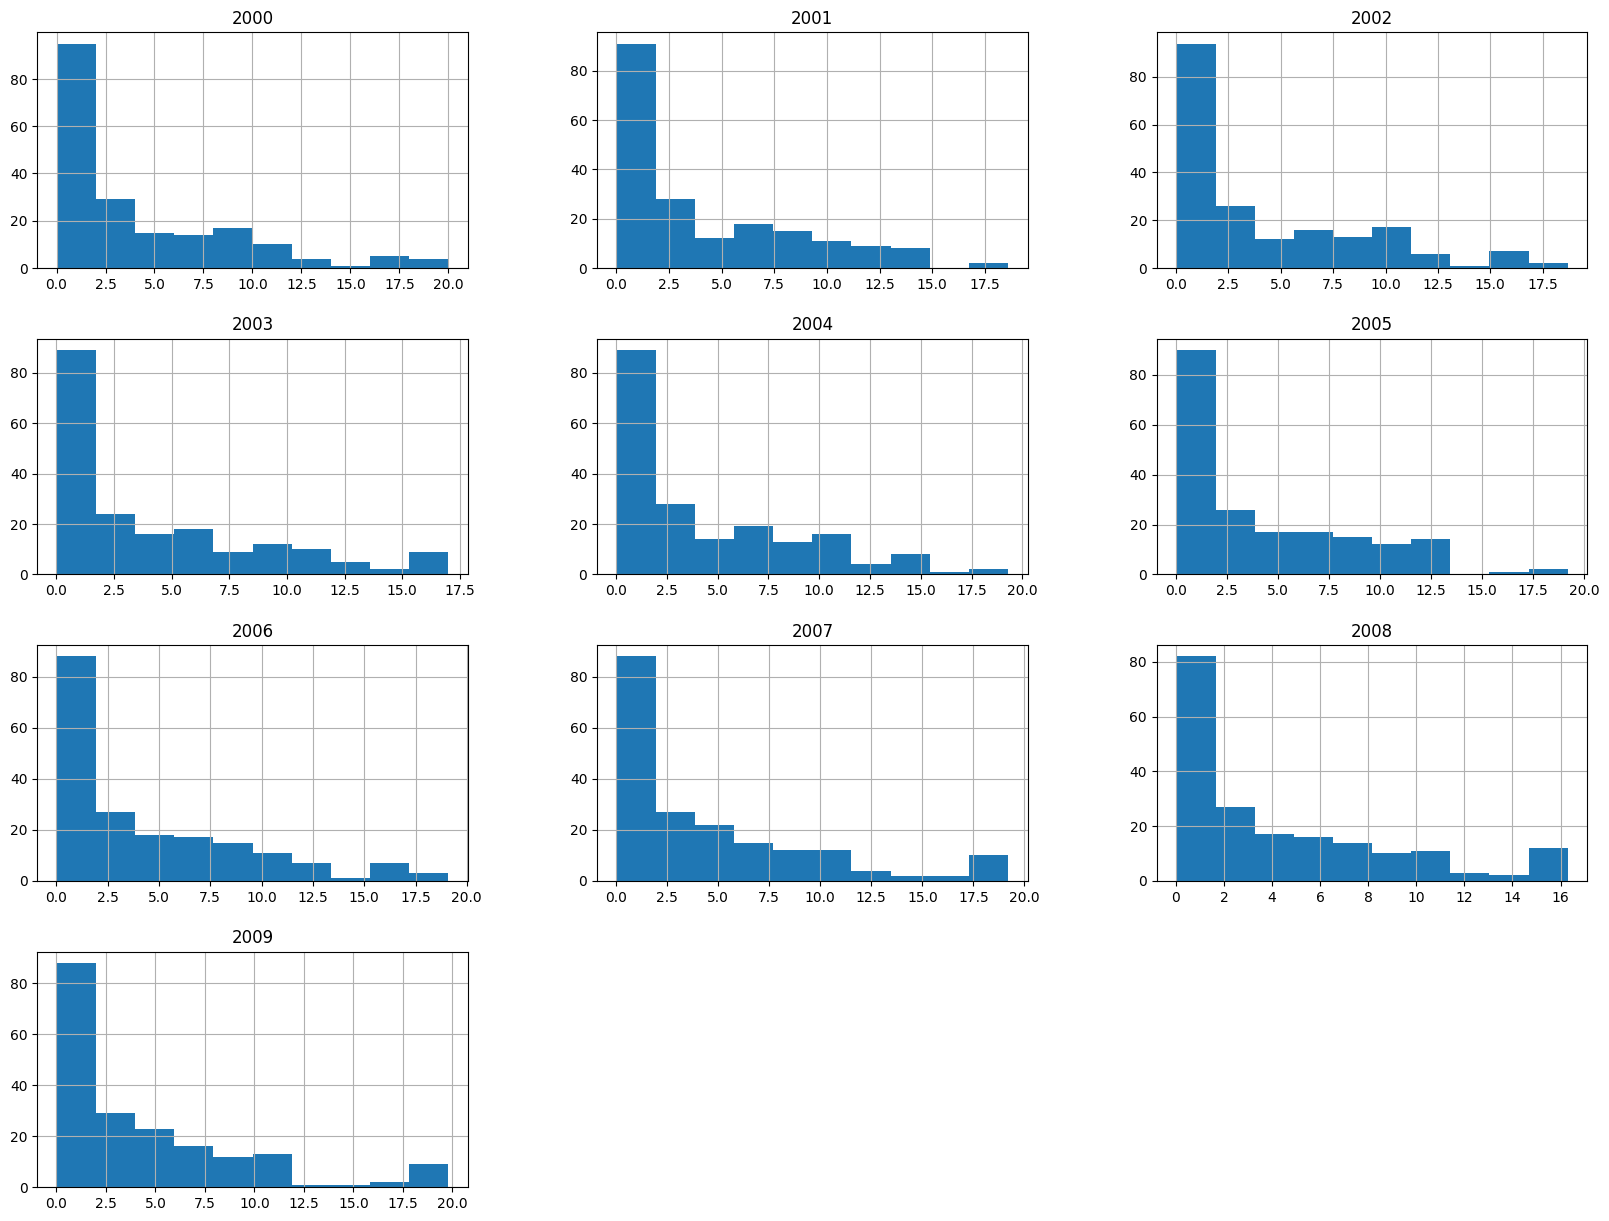

In [29]:
Data.hist(['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009'], figsize=(20, 15))

array([[<AxesSubplot: title={'center': '2010'}>,
        <AxesSubplot: title={'center': '2011'}>,
        <AxesSubplot: title={'center': '2012'}>],
       [<AxesSubplot: title={'center': '2013'}>,
        <AxesSubplot: title={'center': '2014'}>,
        <AxesSubplot: title={'center': '2015'}>],
       [<AxesSubplot: title={'center': '2016'}>,
        <AxesSubplot: title={'center': '2017'}>,
        <AxesSubplot: title={'center': '2018'}>]], dtype=object)

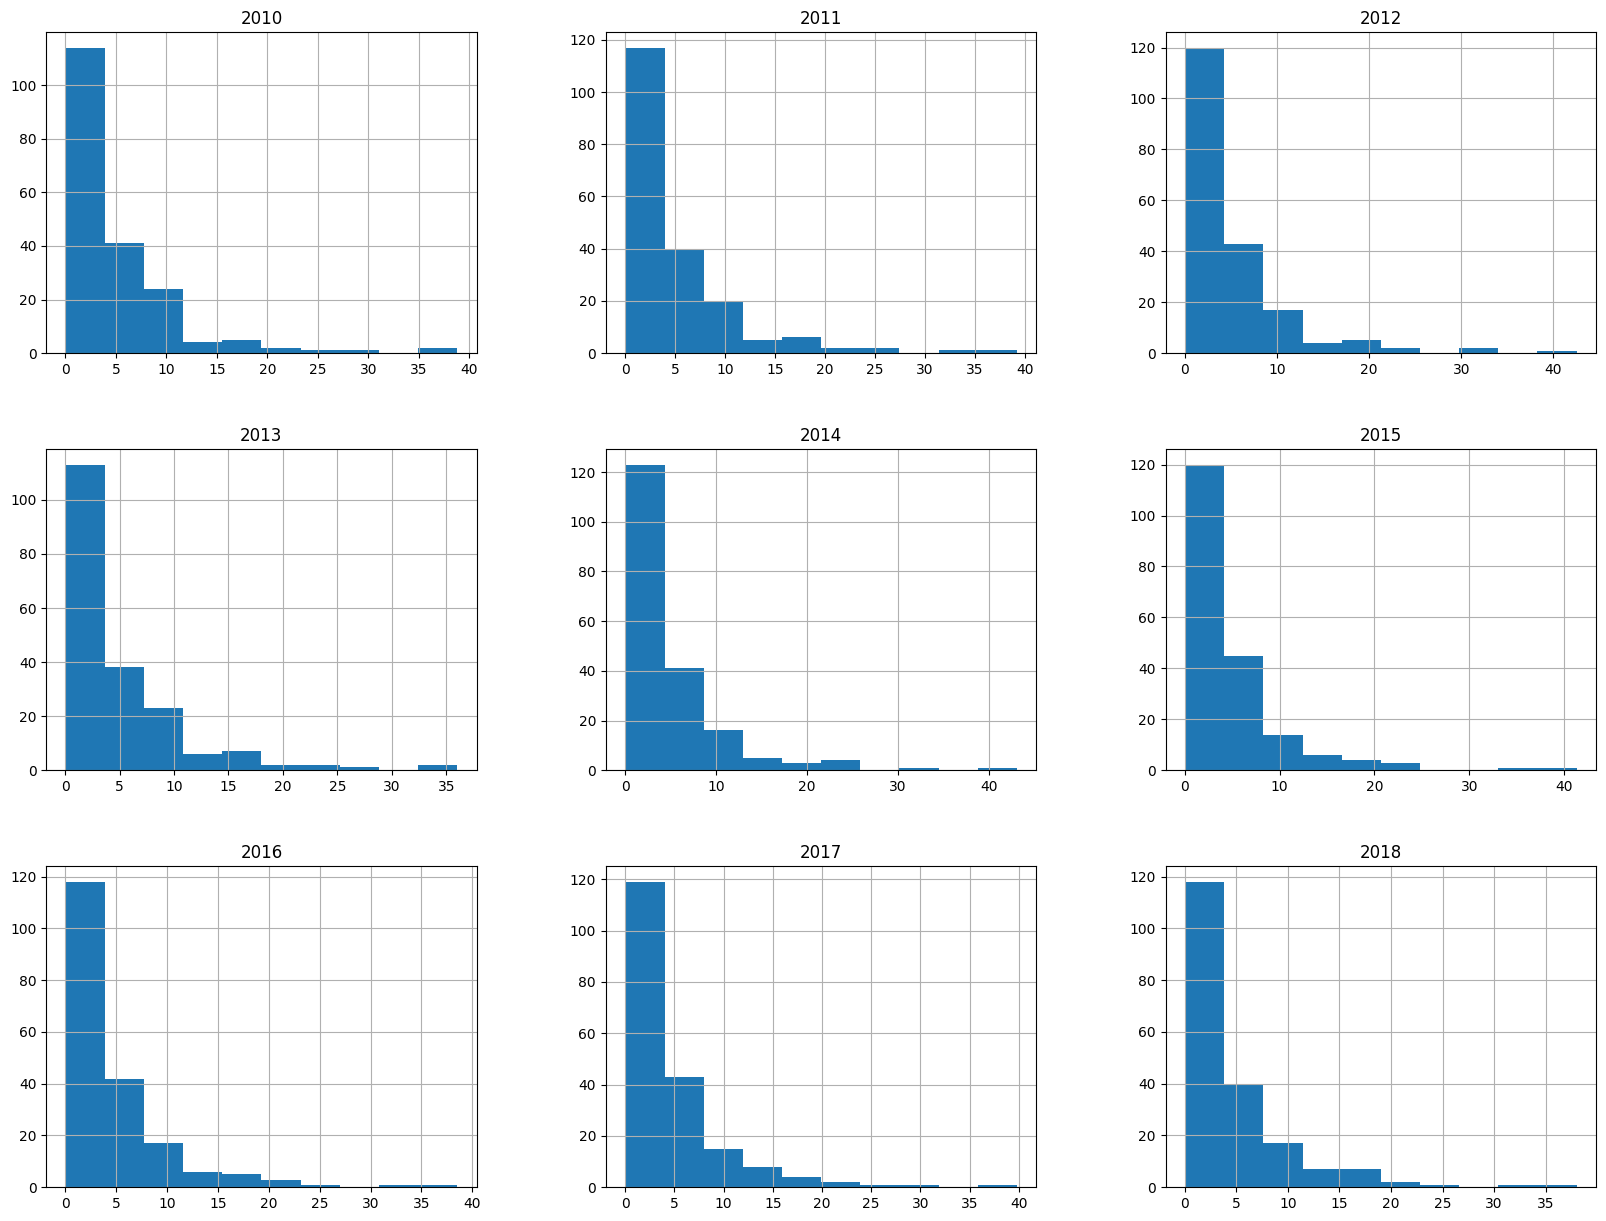

In [30]:
Data.hist(['2010','2011','2012','2013','2014','2015','2016','2017','2018'], figsize=(20, 15))

In [31]:
Data['2010'][Data['2010']>20].sort_values()


25     20.8
105    22.1
17     23.5
95     29.9
174    36.0
145    38.8
Name: 2010, dtype: float64

In [32]:
Data['2018'][Data['2018']>20] = 20.6
Data['2017'][Data['2017']>20] = 22.8
Data['2016'][Data['2016']>20] = 20.0
Data['2015'][Data['2015']>20] = 20.8
Data['2014'][Data['2014']>20] = 19.0
Data['2013'][Data['2013']>20] = 18.3
Data['2012'][Data['2012']>20] = 18.5
Data['2011'][Data['2011']>20] = 16.3
Data['2010'][Data['2010']>20] = 19.8

array([[<AxesSubplot: title={'center': '2010'}>,
        <AxesSubplot: title={'center': '2011'}>,
        <AxesSubplot: title={'center': '2012'}>],
       [<AxesSubplot: title={'center': '2013'}>,
        <AxesSubplot: title={'center': '2014'}>,
        <AxesSubplot: title={'center': '2015'}>],
       [<AxesSubplot: title={'center': '2016'}>,
        <AxesSubplot: title={'center': '2017'}>,
        <AxesSubplot: title={'center': '2018'}>]], dtype=object)

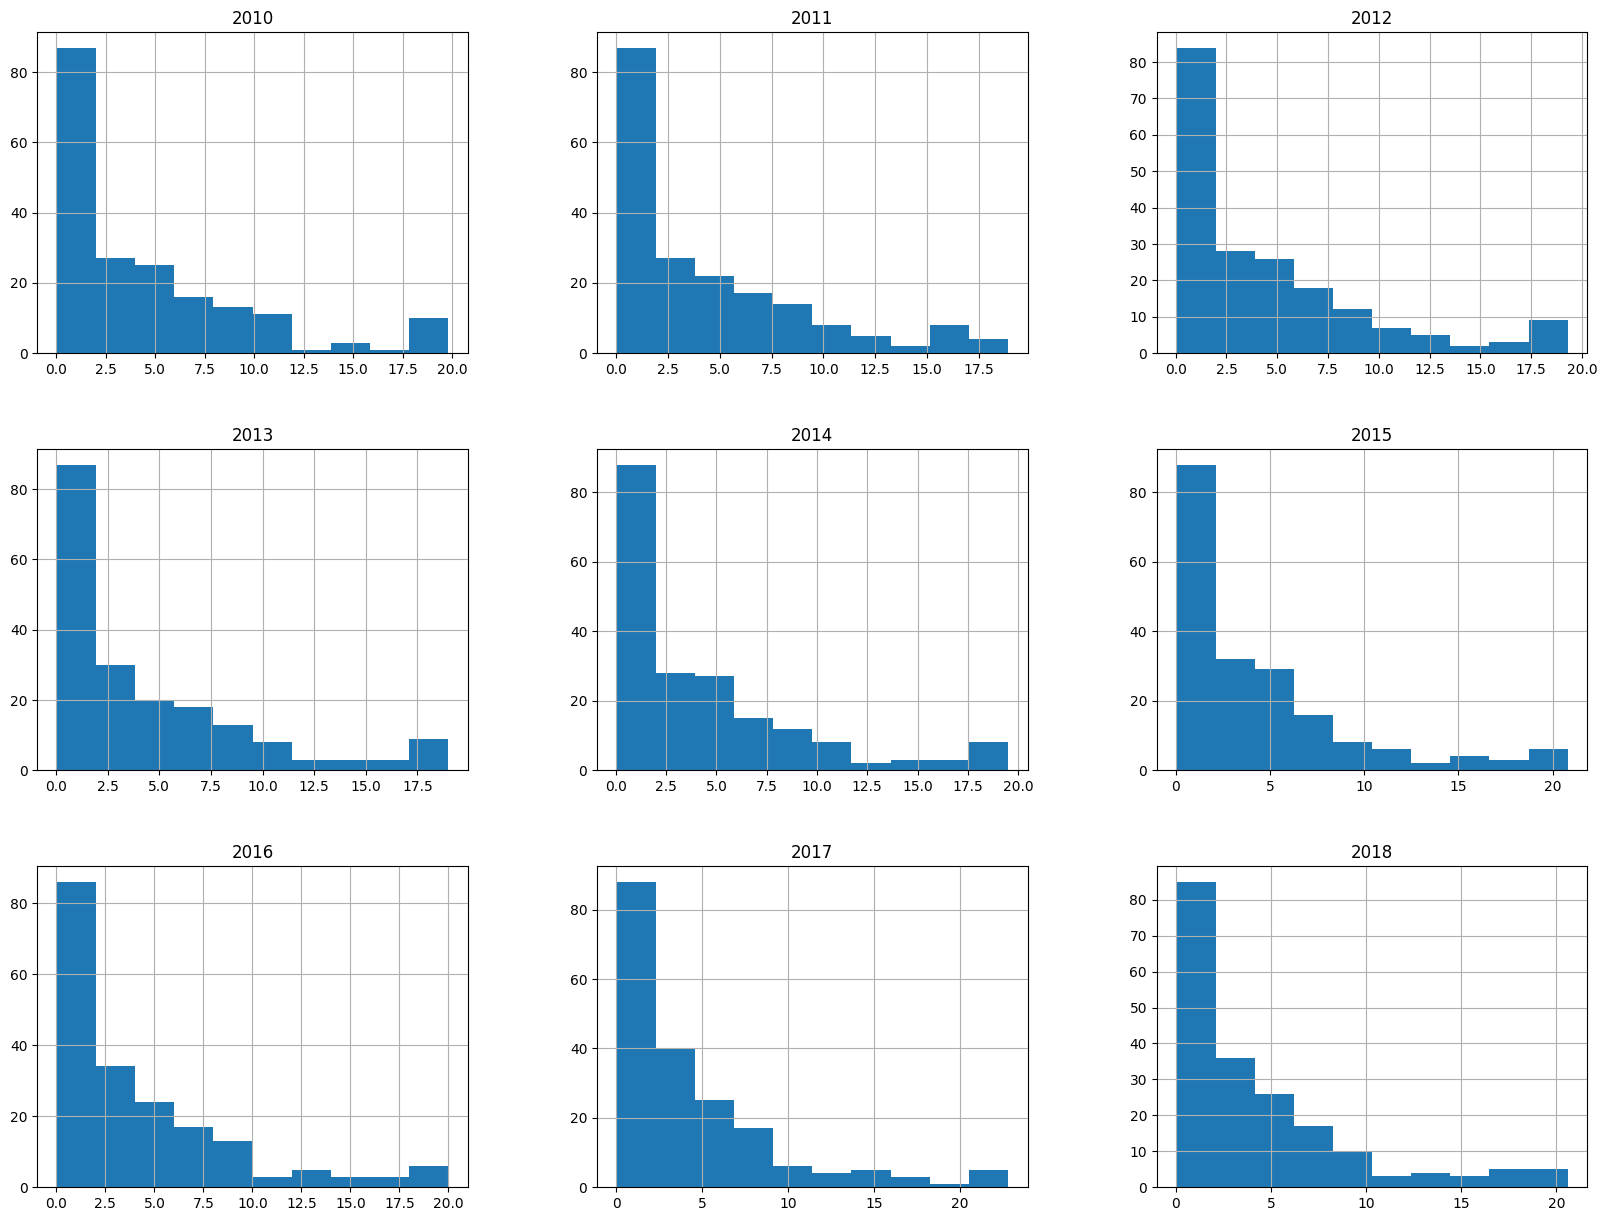

In [33]:
Data.hist(['2010','2011','2012','2013','2014','2015','2016','2017','2018'], figsize=(20, 15))

Checking for the right features to be used for the prediction

In [34]:
def check_feature(target,predictors):
    # considering the target  and predictors as numpy arrays
    #plotting a scatter diagram
    for i in predictors:
        Data.plot.scatter(x=i,y=target)
    

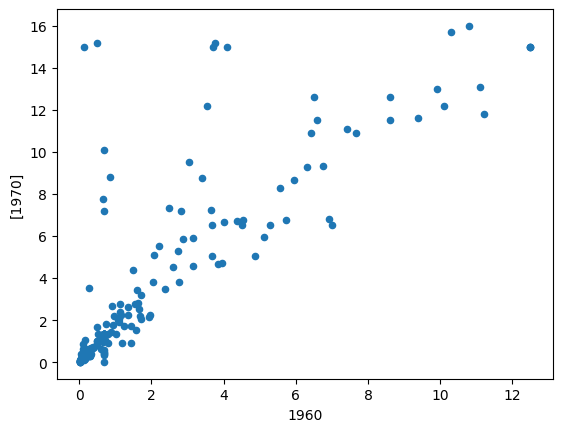

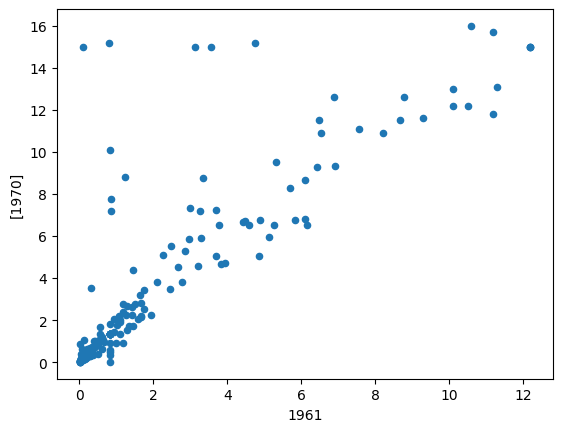

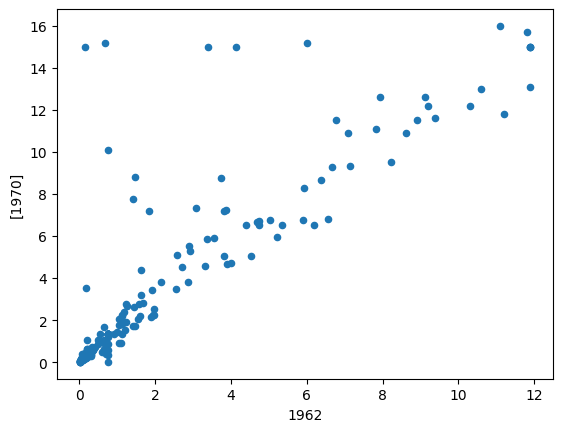

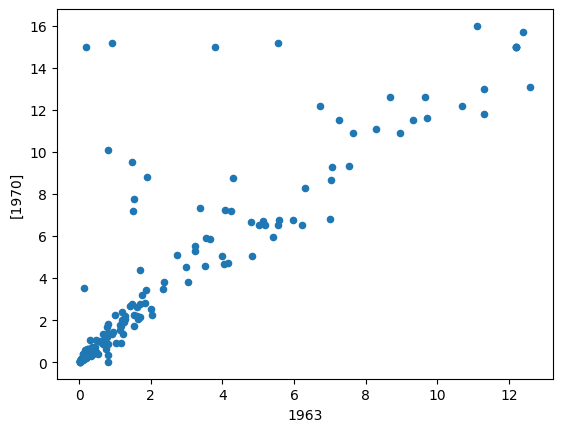

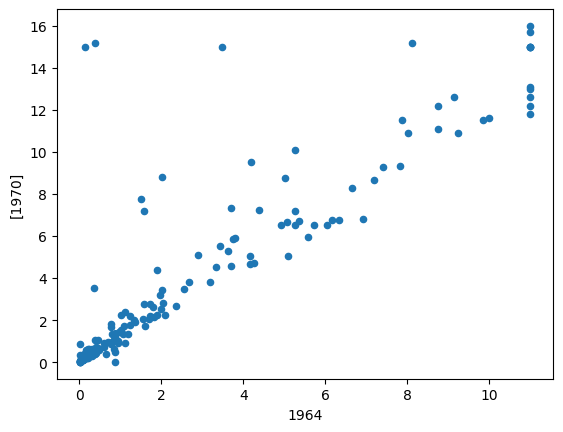

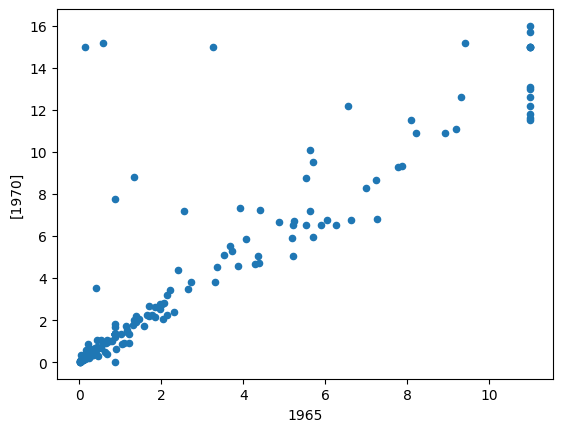

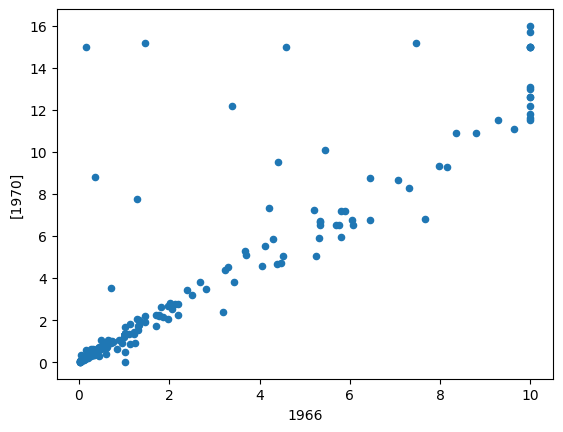

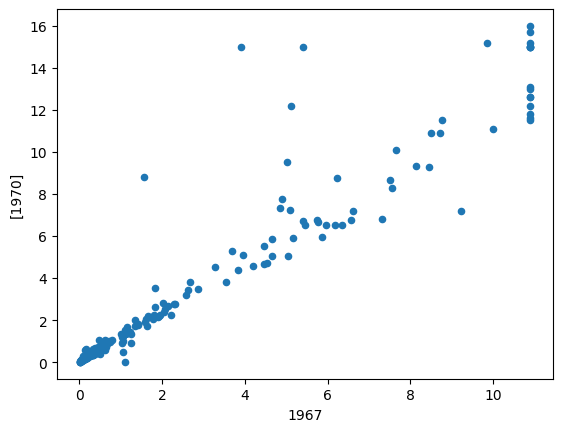

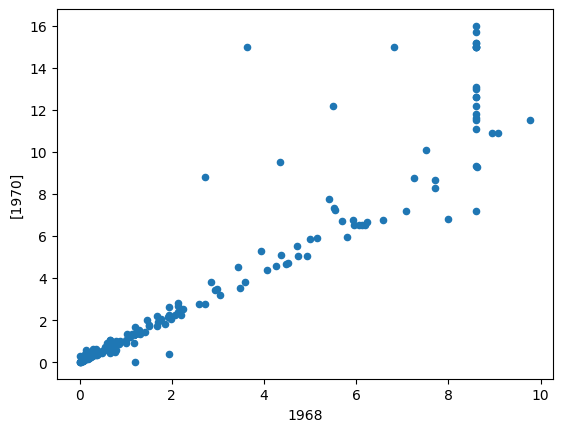

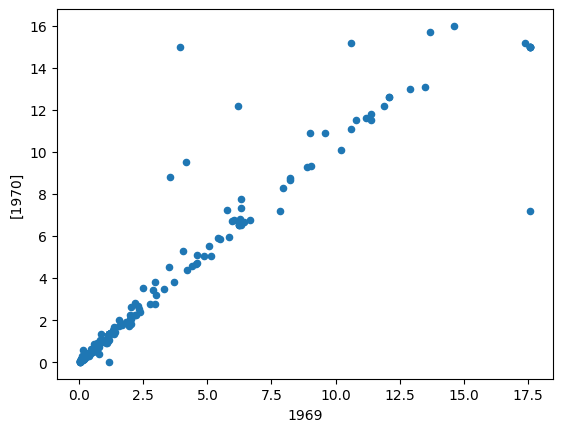

In [35]:
target1 = ['1970']
predictors1 = ['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969']
check_feature(target1,predictors1)

In [36]:
target2 = ['1980']
predictors2 = ['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979']

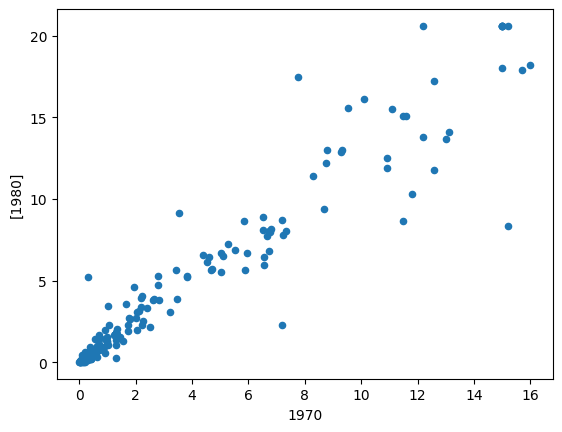

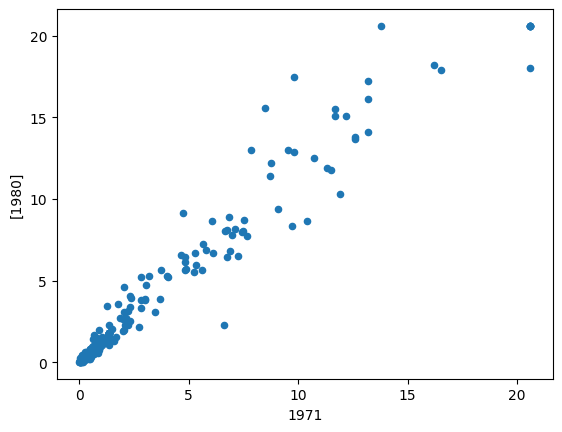

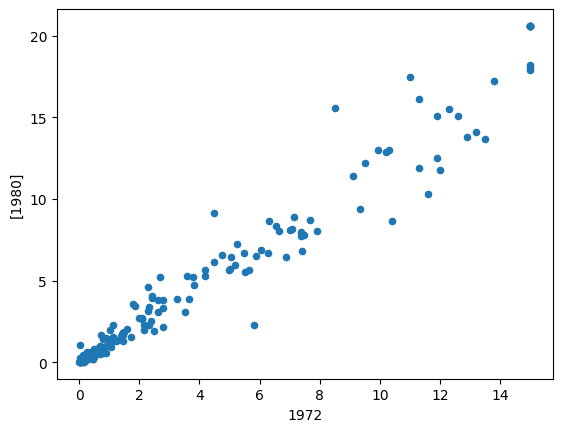

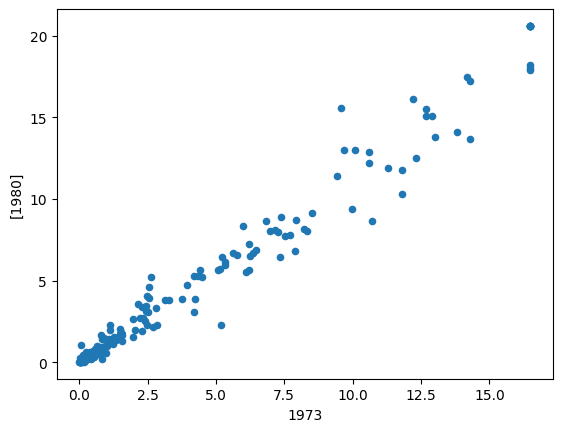

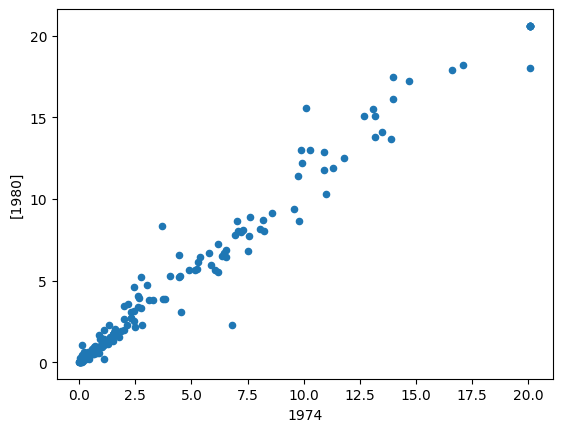

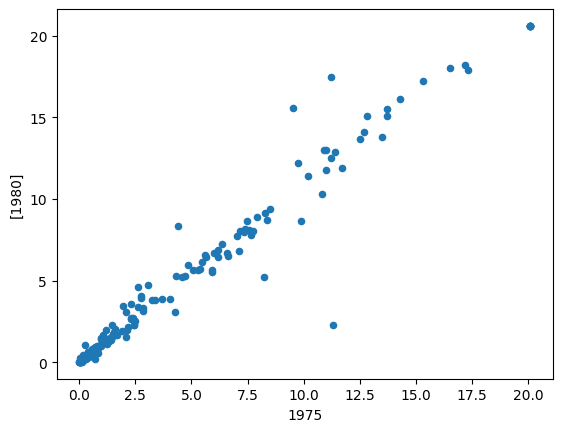

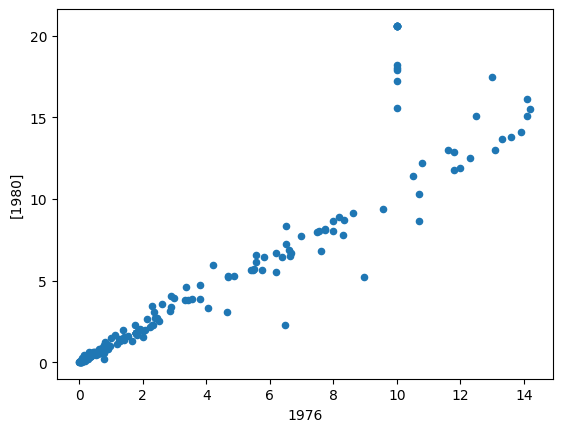

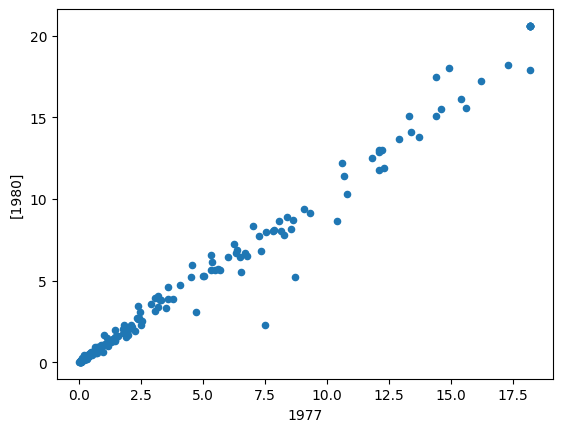

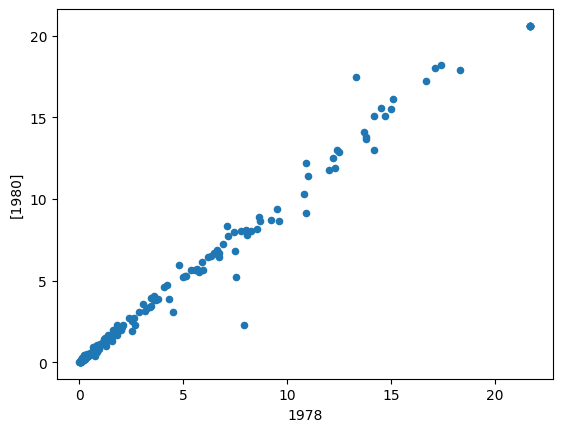

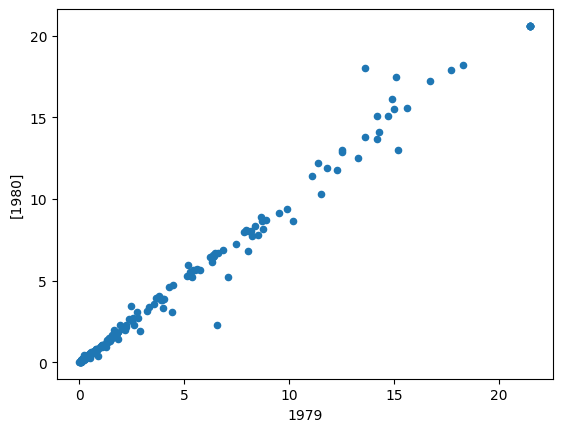

In [37]:
check_feature(target2,predictors2)

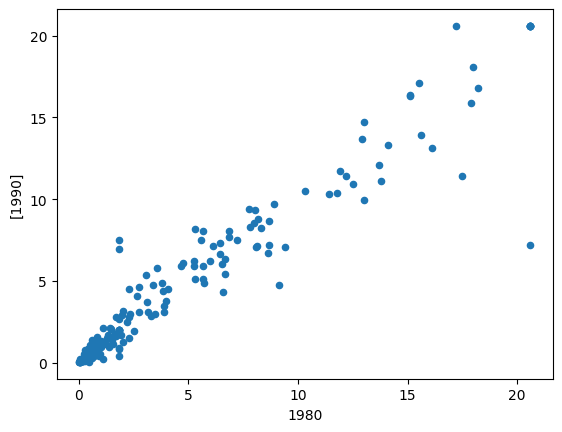

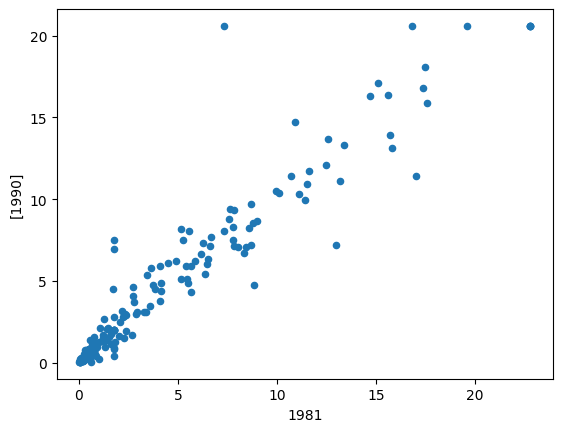

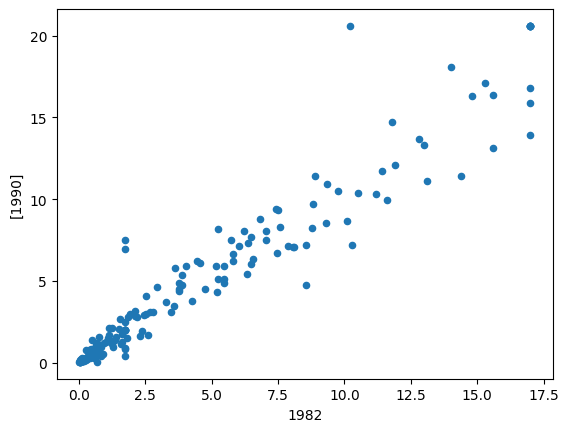

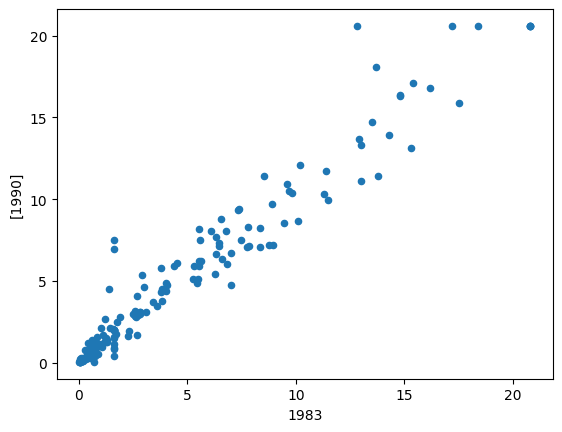

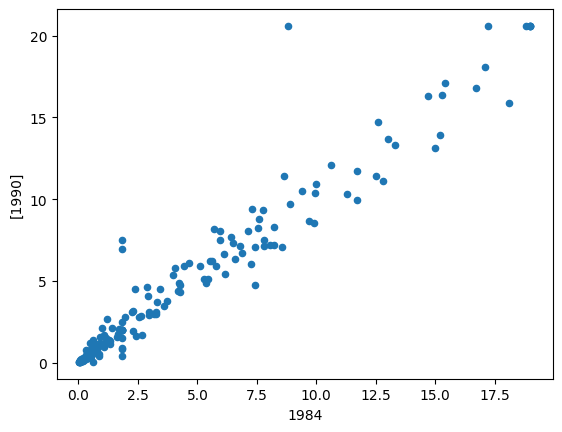

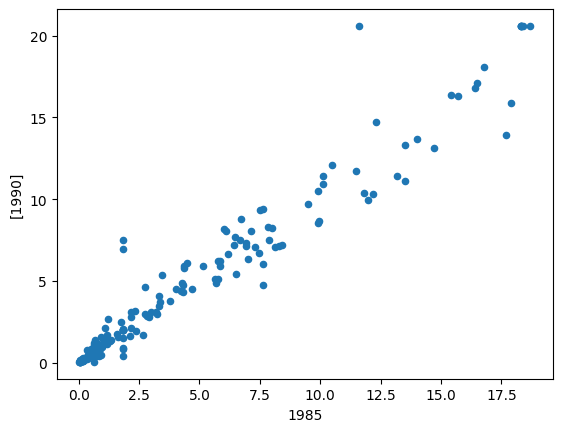

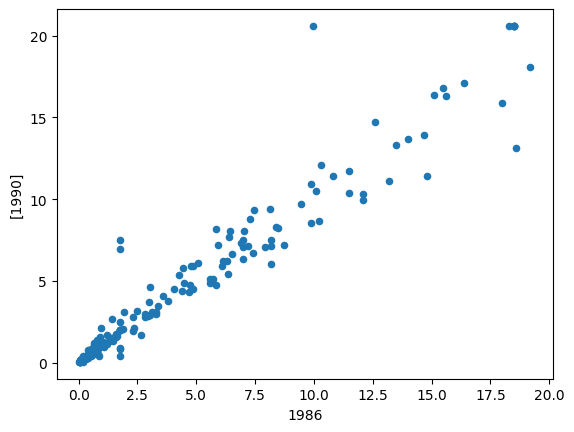

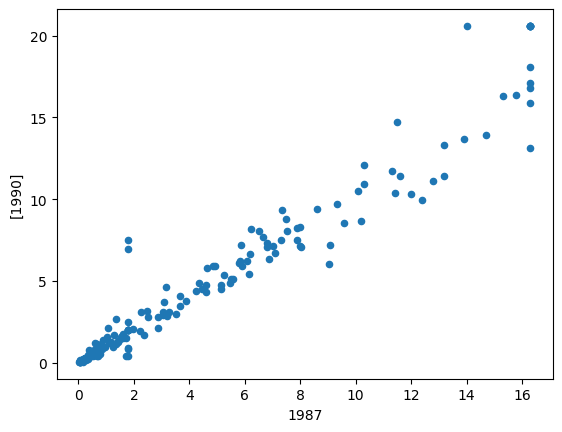

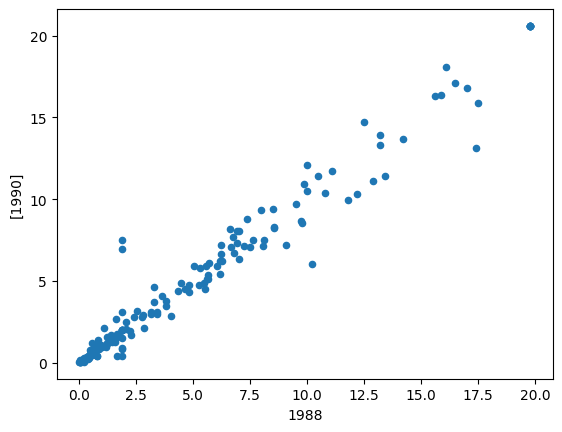

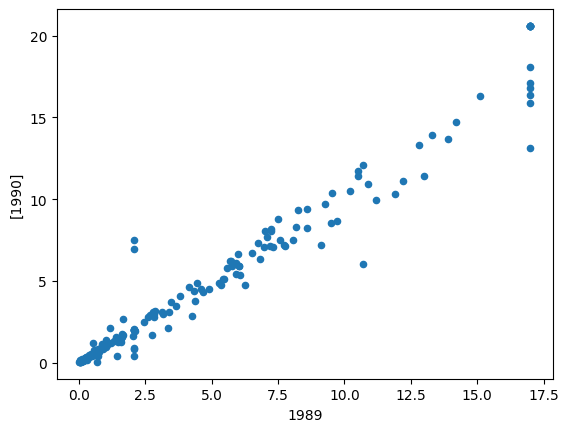

In [38]:
target3 = ['1990']
predictors3 = ['1980','1981','1982','1983','1984','1985','1986','1987','1988','1989']
check_feature(target3,predictors3)

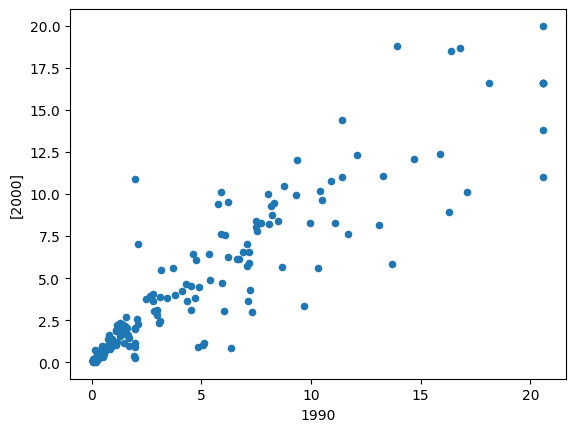

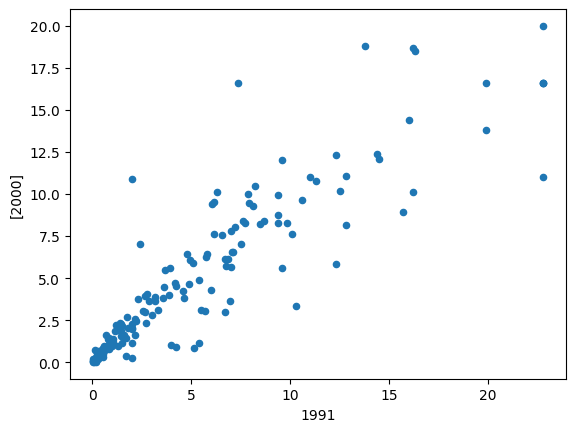

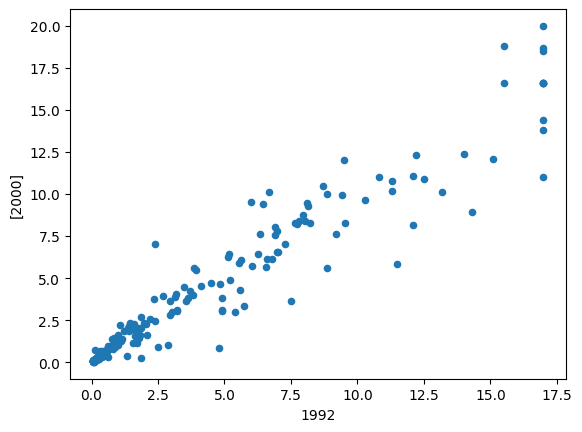

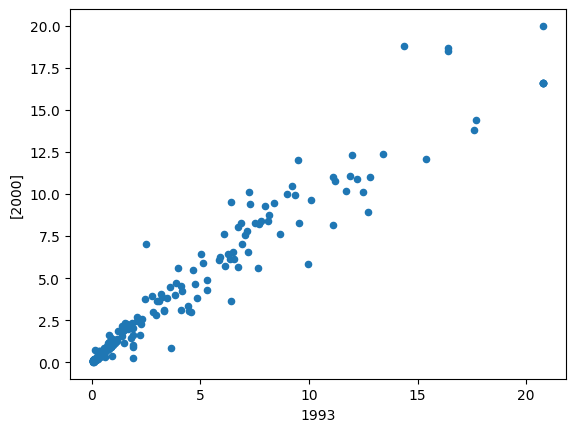

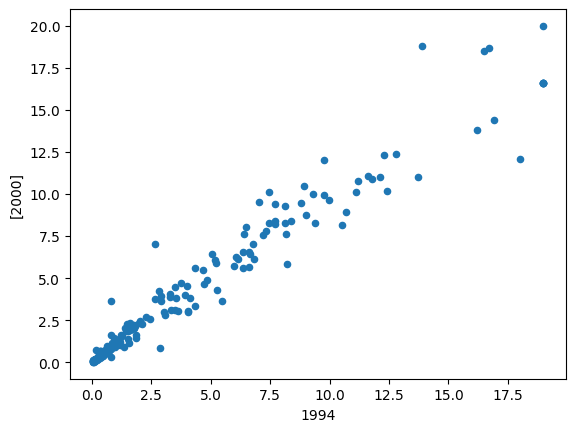

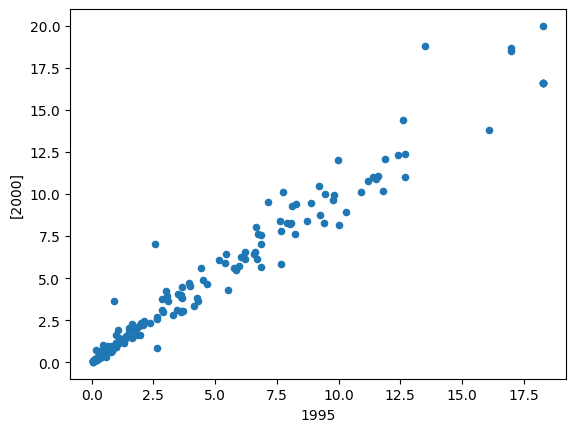

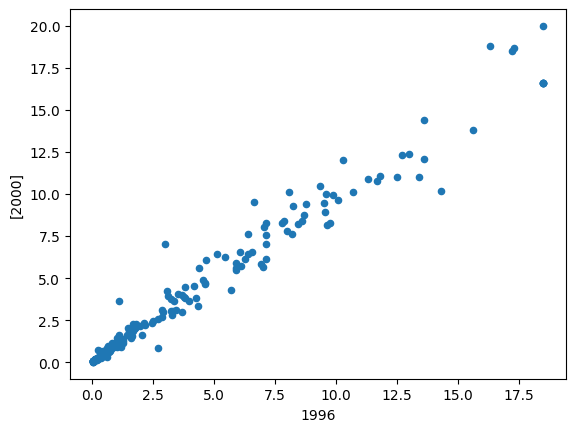

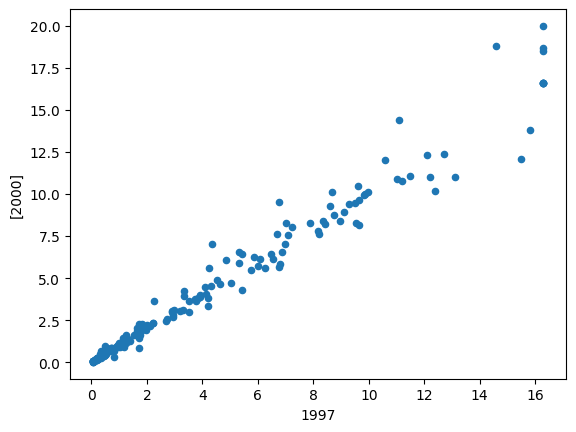

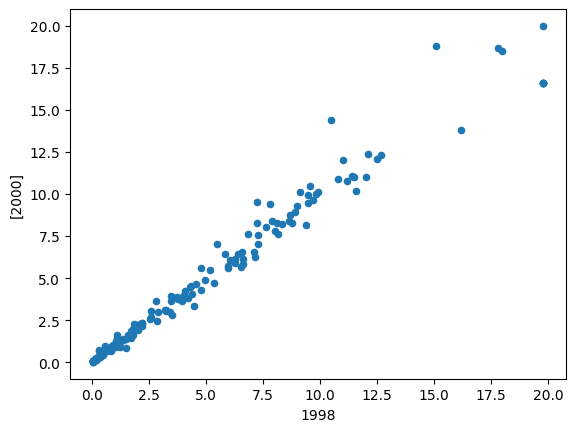

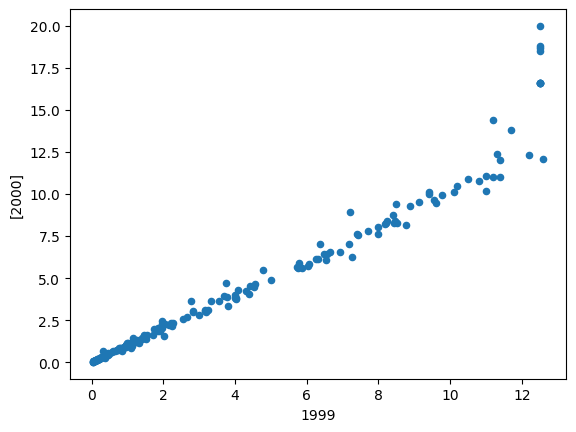

In [39]:
target4 = ['2000']
predictors4 = ['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999']
check_feature(target4,predictors4)

All the variables seem to be relevant for the prediction of the co2 emission, therefore i will use all of them.

Adding another feature of 2019 to the dataset
- with value of  0.4400

In [40]:
# adding a new column to the dataframe
# the value is `the average of the values of the previous 10 years  
Data['2019'] = Data[['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969']].mean(axis=1)

In [41]:
Data

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.046,0.0536,0.0737,0.0741,0.0861,0.101,0.107,0.123,0.115,...,0.290,0.406,0.345,0.280,0.253,0.262,0.245,0.247,0.254,0.08660
1,Angola,0.101,0.0821,0.2100,0.2030,0.2130,0.206,0.269,0.172,0.289,...,1.240,1.250,1.350,1.280,1.640,1.220,1.180,1.140,1.120,0.22251
2,Albania,1.240,1.3500,1.4200,1.1600,1.0900,1.150,1.310,1.340,1.500,...,1.560,1.790,1.690,1.690,1.900,1.600,1.570,1.610,1.590,1.31100
3,Andorra,0.694,0.8220,0.7500,0.7915,0.8640,0.880,1.010,1.110,1.210,...,6.120,5.870,5.920,5.900,5.830,5.970,6.070,6.270,6.120,0.93115
4,United Arab Emirates,0.119,0.1090,0.1640,0.1760,0.1330,0.147,0.160,5.400,6.810,...,18.300,18.900,18.500,18.300,19.000,20.800,20.000,22.800,20.600,3.08180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Samoa,0.135,0.1640,0.1580,0.1840,0.2080,0.231,0.196,0.191,0.213,...,1.010,1.080,1.050,1.040,1.090,1.210,1.260,1.290,1.320,0.18890
190,Yemen,0.684,0.4940,0.7100,0.5250,0.6440,0.686,0.596,0.517,1.940,...,1.000,0.849,0.747,0.994,0.937,0.480,0.377,0.363,0.356,0.75630
191,South Africa,5.730,5.8300,5.8900,5.9600,6.3300,6.620,6.450,6.560,6.590,...,9.160,9.160,8.770,8.530,8.860,8.350,8.460,8.120,8.100,6.26200
192,Zambia,1.420,1.1700,1.1000,1.0300,0.9460,1.100,0.951,1.260,1.170,...,0.189,0.199,0.241,0.252,0.277,0.271,0.296,0.304,0.302,1.12070


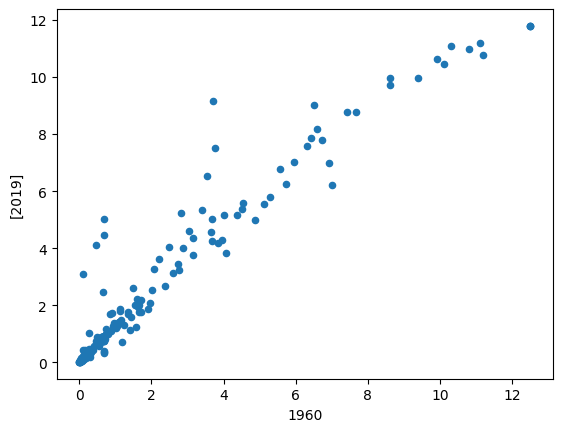

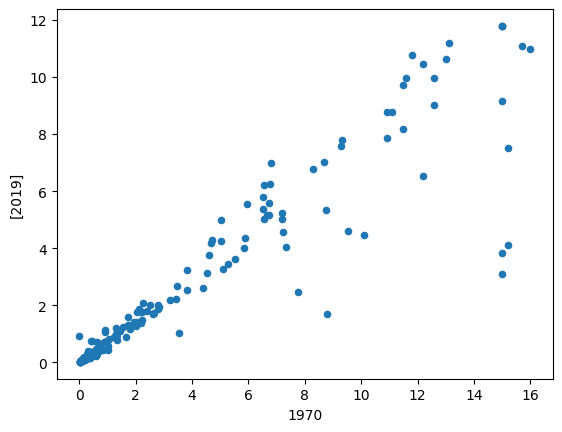

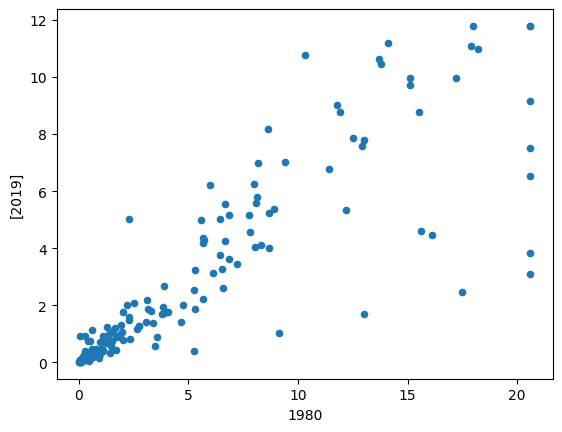

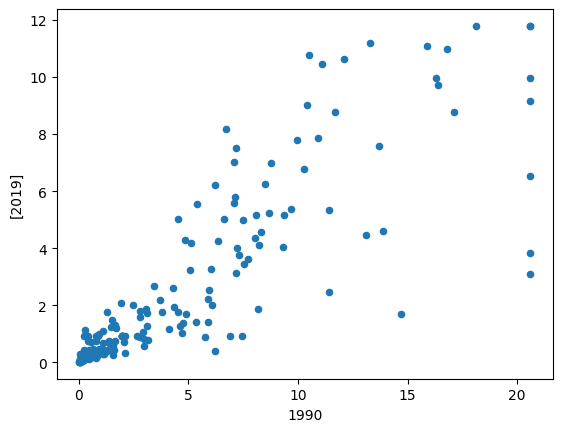

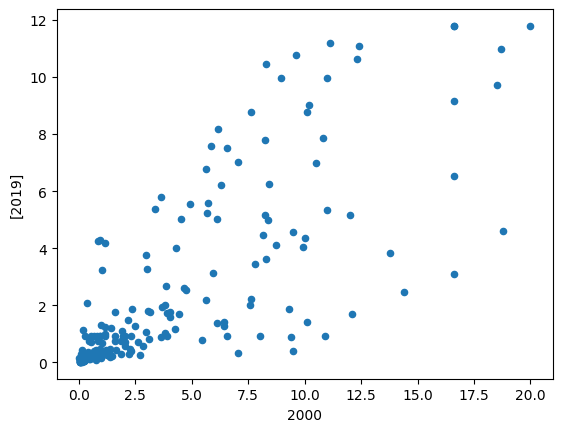

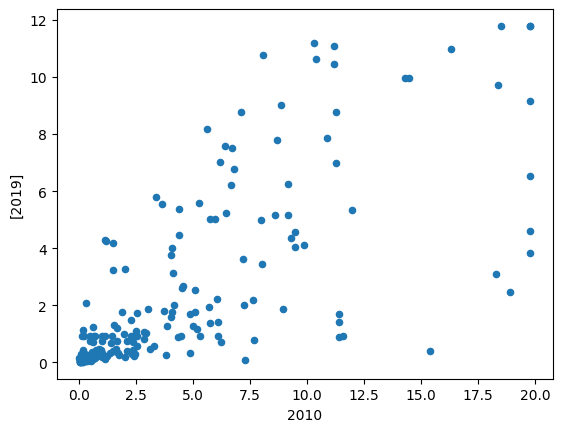

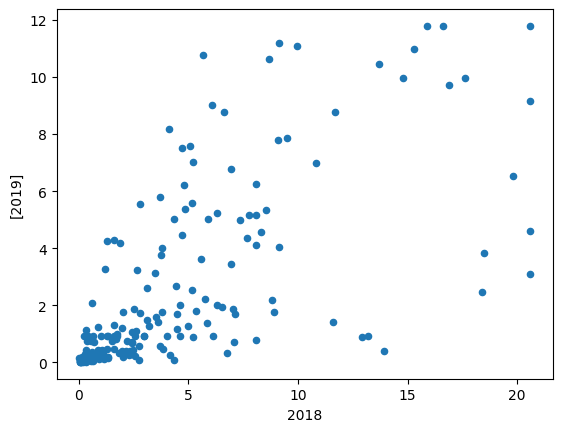

In [42]:
# Generating a new dataframe with the required columns of the years with a gap of 10 years
Data1 = ['1960','1970','1980','1990','2000','2010','2018']
#setting 2019 as my target variable
target5 = ['2019']
predictors5 = Data1
check_feature(target5,predictors5)


We realise that 1970 is not correlated with the target, therefore we will remove it.

## Building the model

In [43]:
# using the Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Data[predictors5], Data[target5], test_size=0.2, random_state=42)
#printing the shape of the training and testing sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(155, 7)
(39, 7)
(155, 1)
(39, 1)


In [44]:
# creating a Linear Regression model
model = LinearRegression()
# fitting the model to the training data
model.fit(X_train, y_train)
# predicting the values of the testing set
y_pred = model.predict(X_test)
# calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)    
print(mse)

0.11031624218588451


In [45]:
y_pred

array([[ 0.84773303],
       [ 4.10023713],
       [ 0.35873198],
       [ 0.4067688 ],
       [ 1.48088444],
       [ 0.23038888],
       [ 0.13495585],
       [ 0.15061917],
       [ 0.92682431],
       [ 1.79261986],
       [ 5.31585384],
       [ 6.63469005],
       [ 6.55836245],
       [ 4.92016117],
       [ 0.45397264],
       [ 1.21058686],
       [ 0.33492613],
       [ 3.29085918],
       [ 5.75625461],
       [ 0.38869485],
       [ 0.6305811 ],
       [ 0.94459981],
       [ 0.14908864],
       [ 0.6740048 ],
       [ 0.161329  ],
       [ 1.19356649],
       [-0.75524169],
       [ 0.88980701],
       [ 4.42726043],
       [ 1.00838357],
       [ 1.88572995],
       [ 0.17518652],
       [ 0.97038734],
       [ 1.14259752],
       [ 0.47511352],
       [ 0.22158268],
       [ 1.93198607],
       [ 0.15398792],
       [ 0.43915173]])

In [46]:
# calculating the score of the model
model.score(X_test, y_test)

0.9757987385337468

### Bcking up the model in pickle.

In [47]:
import pickle
import os
# saving the model to the local file system
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
    file.close()
print("Model saved at {}".format(os.getcwd()))

Model saved at d:\YR2 Sem2\AI\A96447\Trial\co2emissions
